In [1]:
import astropy.stats as apy

In [2]:
import bk.load
import bk.compute
import bk.plot
import bk.signal

In [3]:
import pandas as pd
import numpy as np
import scipy as sp

In [4]:
import matplotlib.pyplot as plt

In [5]:
import scipy.signal
import scipy.stats

In [6]:
import os

In [12]:
os.getcwd()

'Z:\\Python\\Billel'

In [8]:
bk.load.current_session()
states = bk.load.states()
# lfp = bk.load.lfp_in_intervals(166,23,states['Rem'])
lfp = bk.load.lfp(23,0,5000)
lfp = lfp.restrict(states['Rem'])
lfp_filt = bk.signal.passband(lfp,4,12)
power,phase = bk.signal.hilbert(lfp_filt)

neurons,metadata = bk.load.loadSpikeData(bk.load.path)

Rat : 8 on day : 6
Working with session Rat08-20130713 @ Z:\Rat08\Rat08-20130713
Z:\Rat08\Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


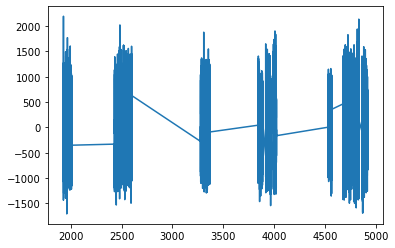

In [10]:
plt.plot(lfp.as_units('s'))

<ipython-input-12-2863c7da2df0>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplot_mosaic('''


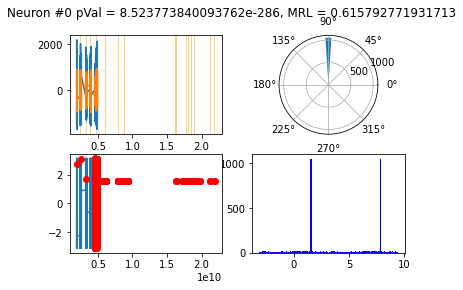

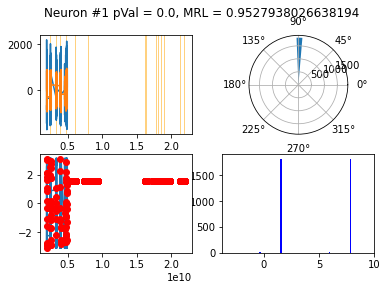

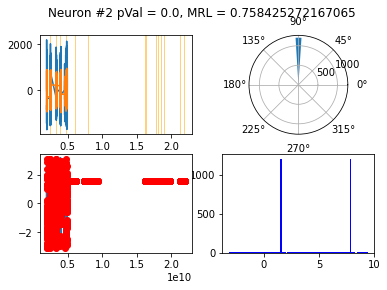

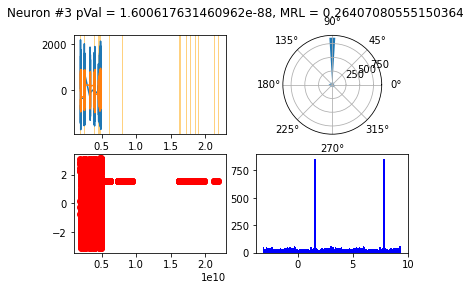

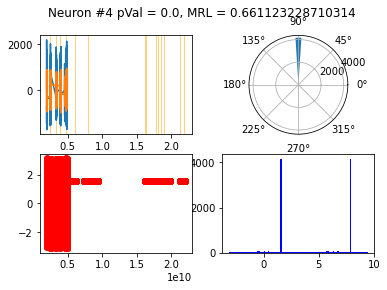

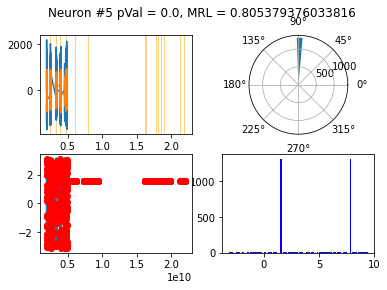

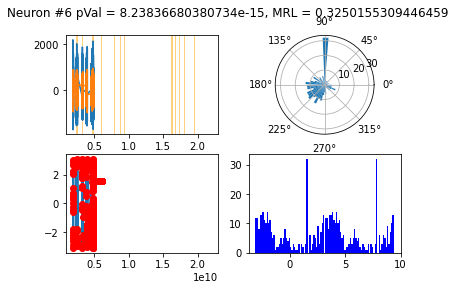

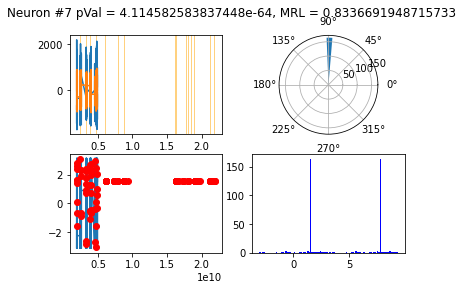

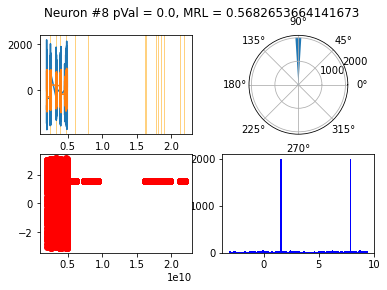

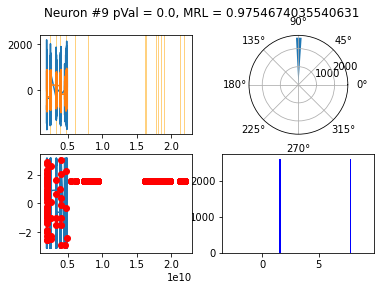

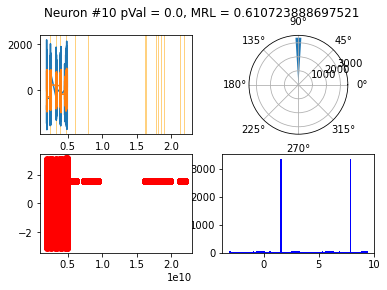

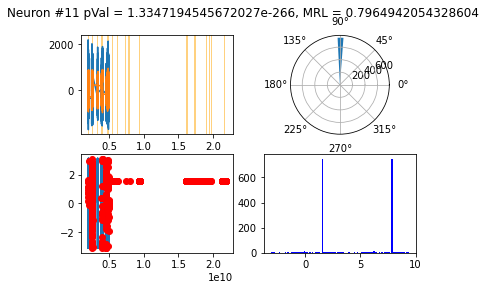

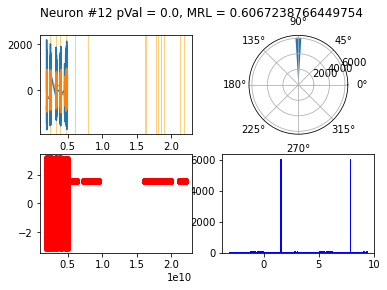

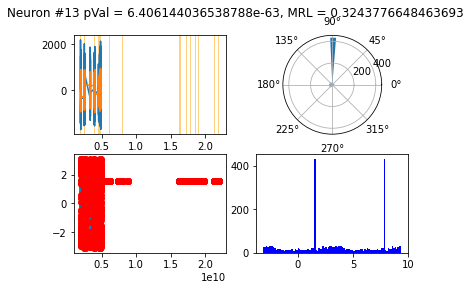

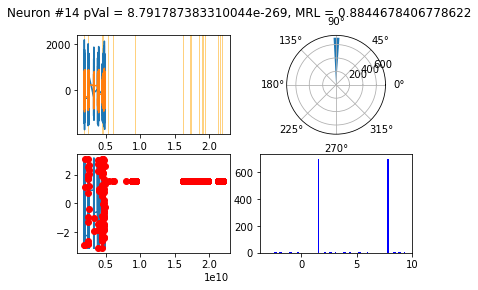

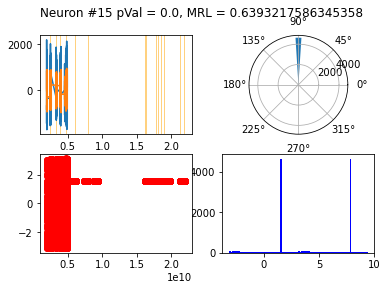

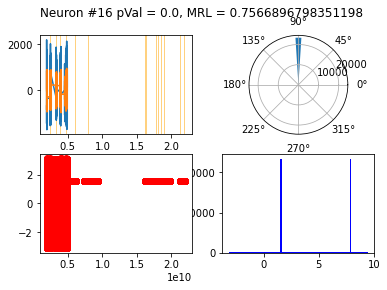

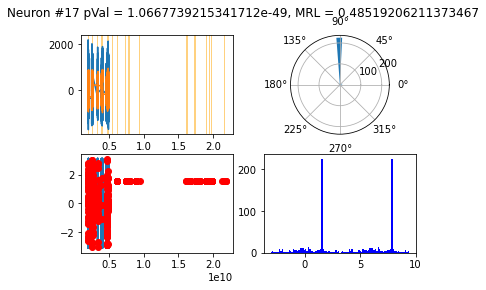

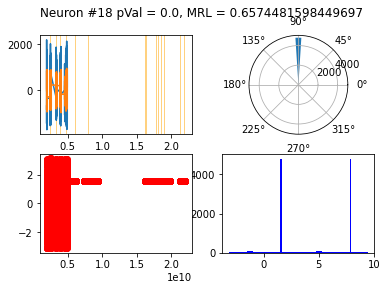

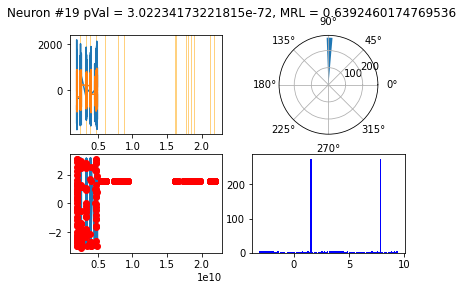

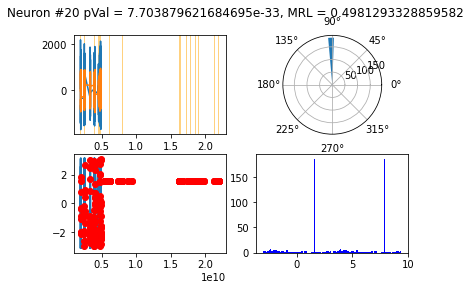

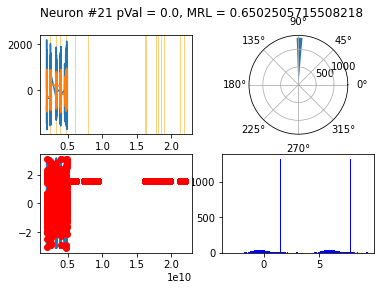

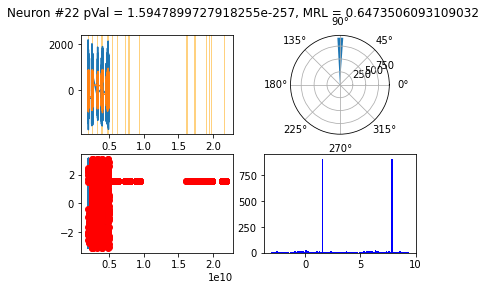

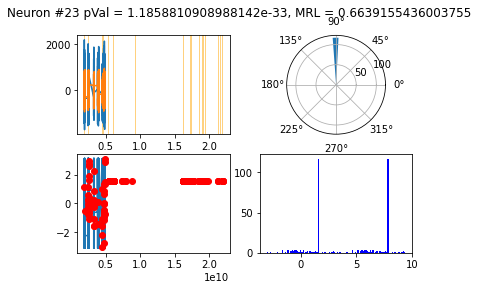

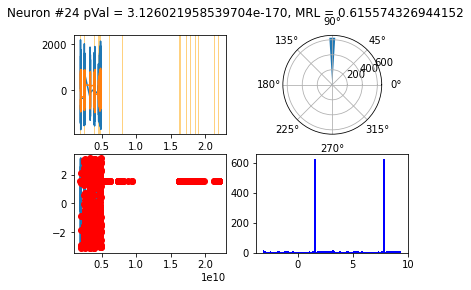

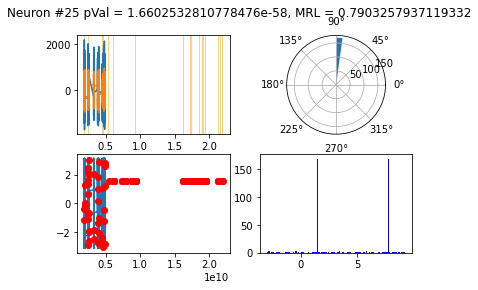

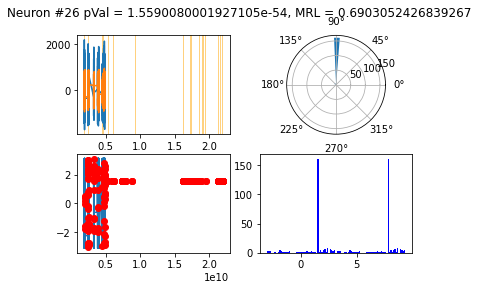

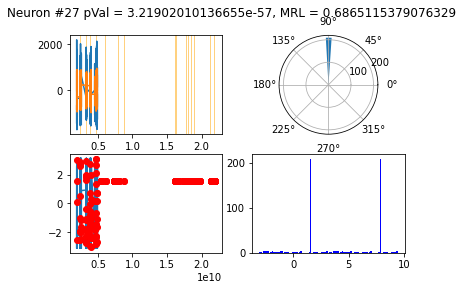

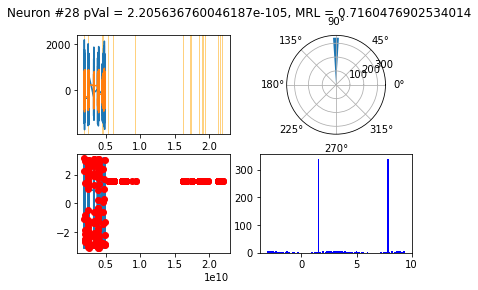

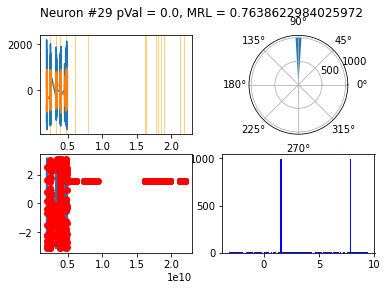

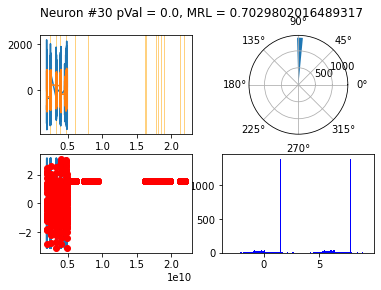

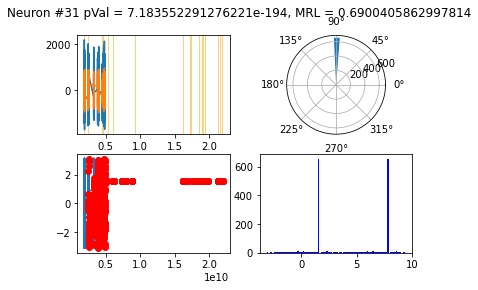

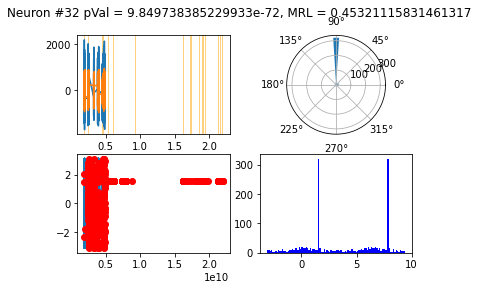

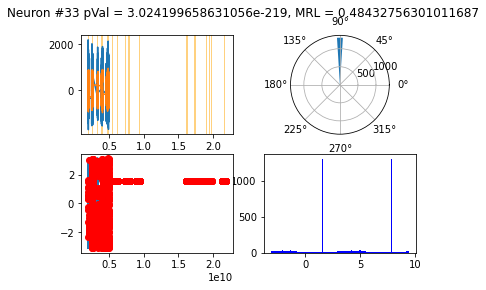

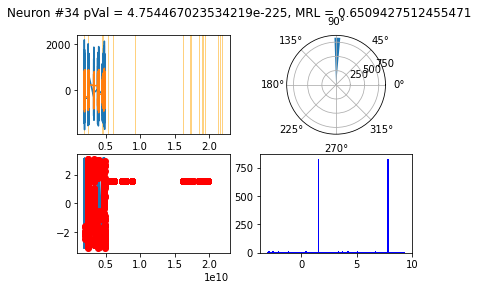

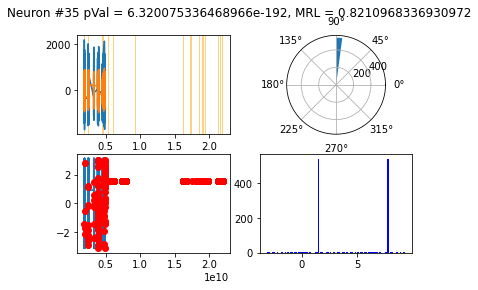

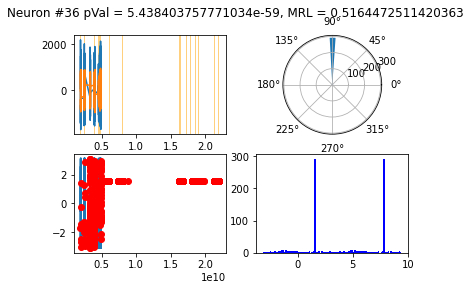

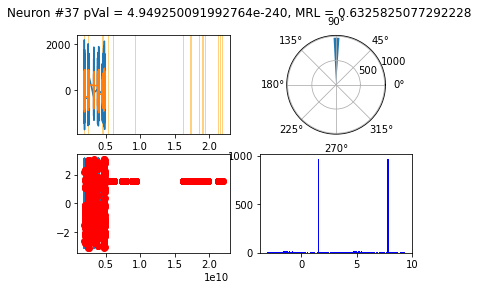

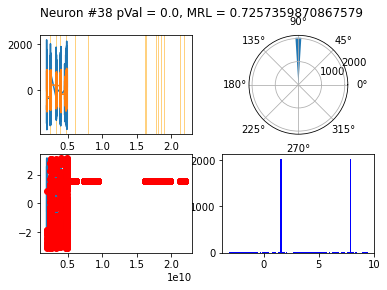

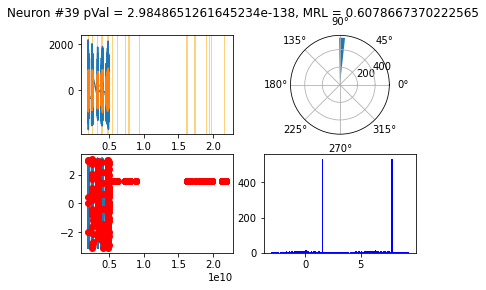

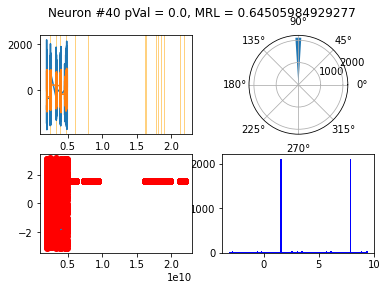

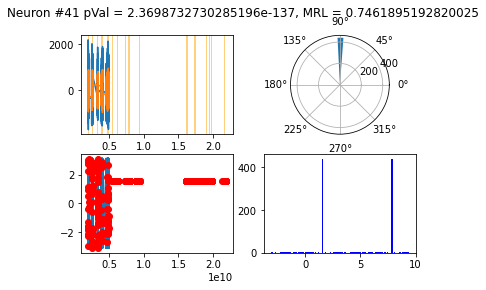

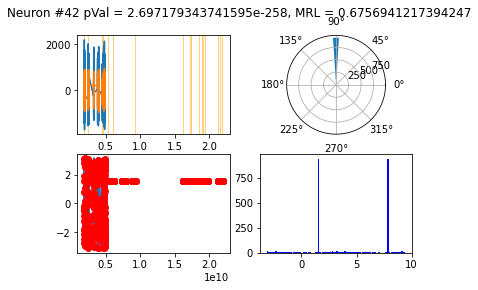

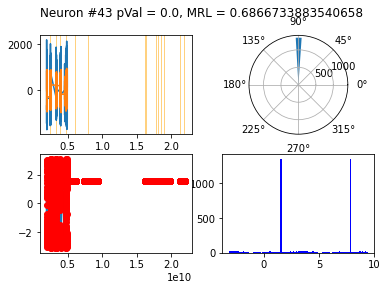

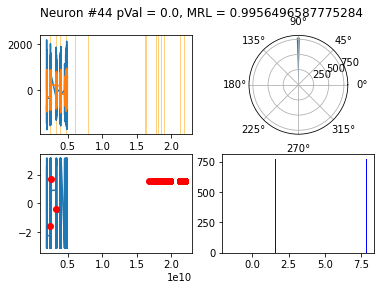

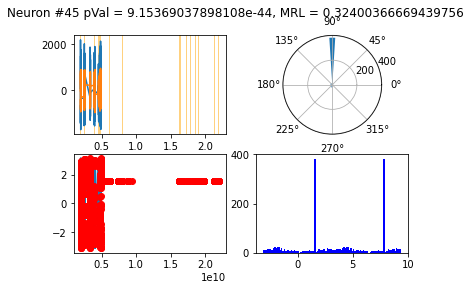

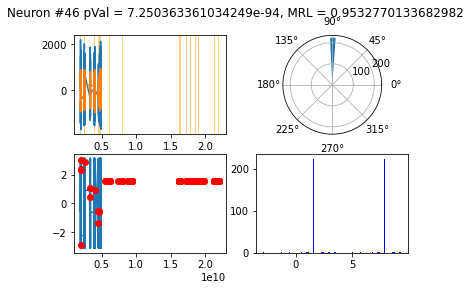

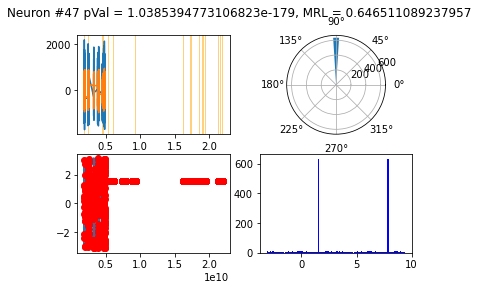

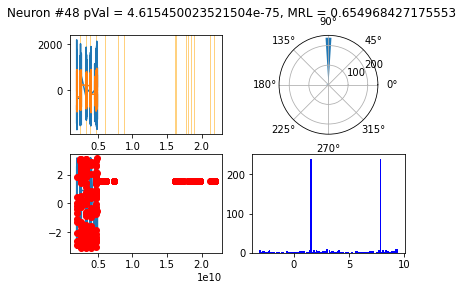

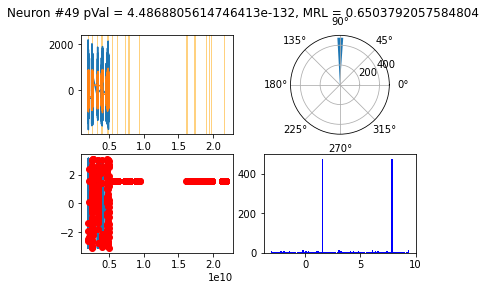

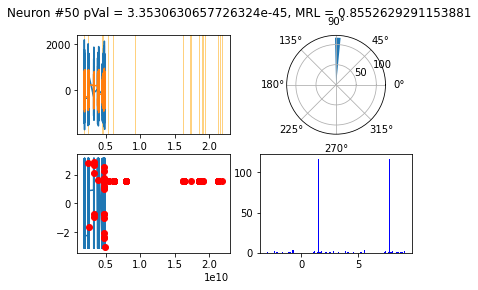

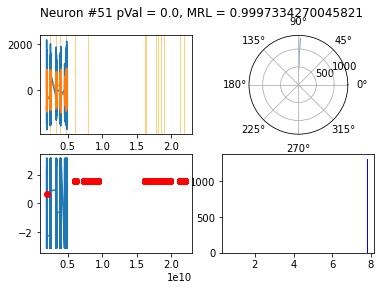

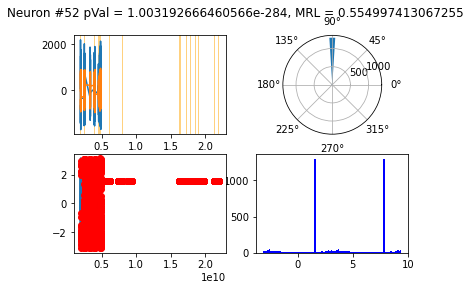

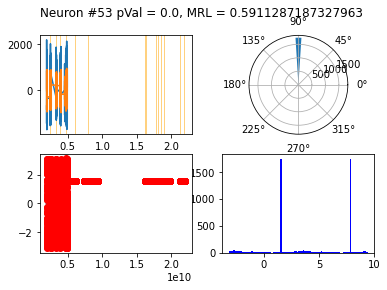

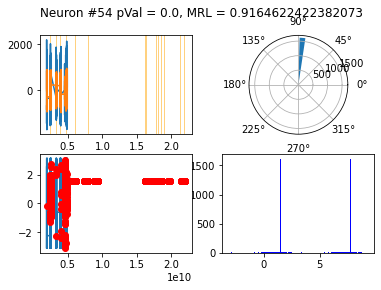

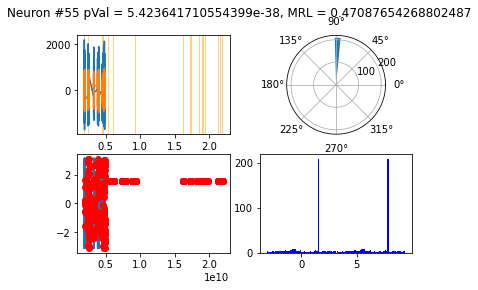

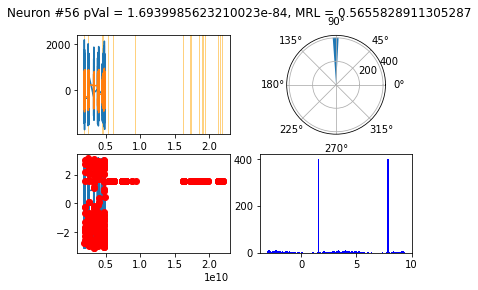

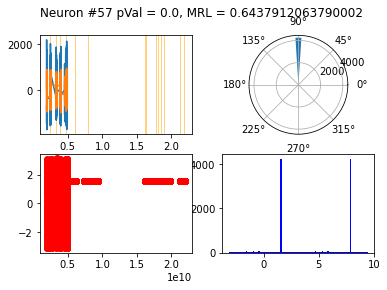

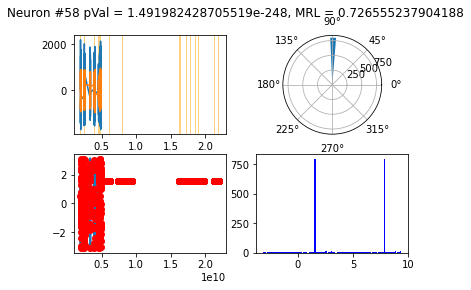

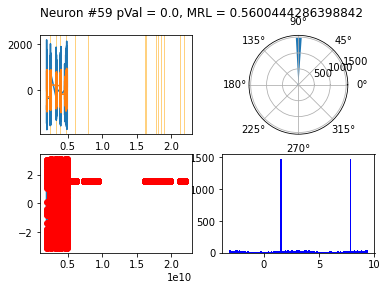

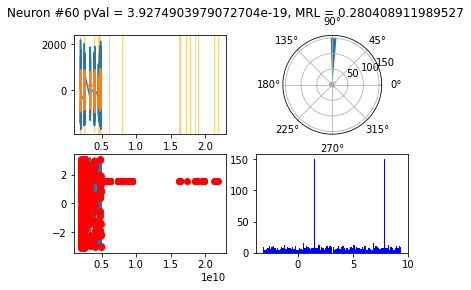

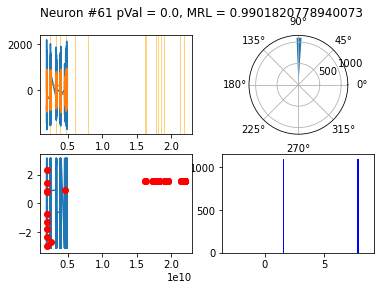

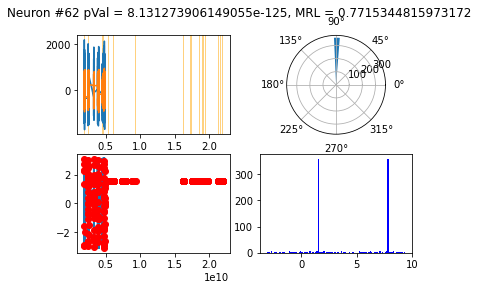

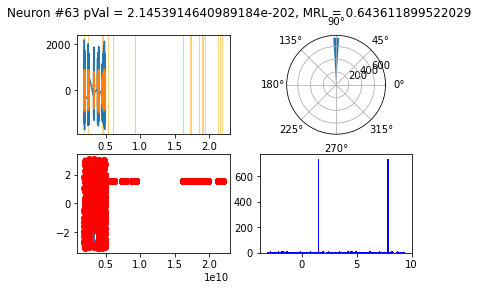

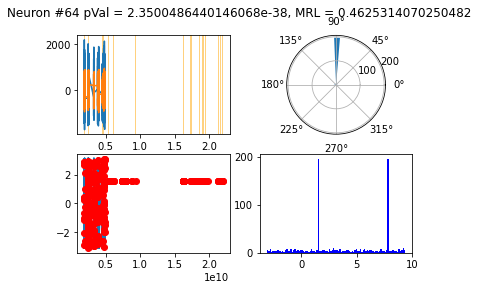

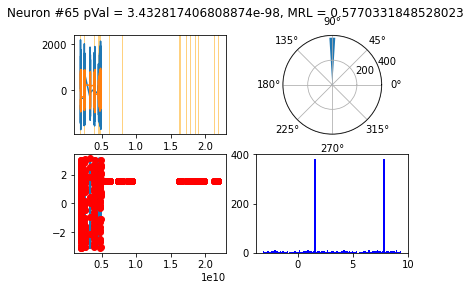

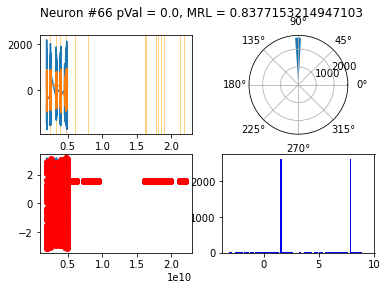

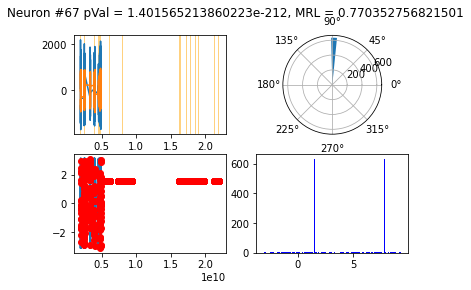

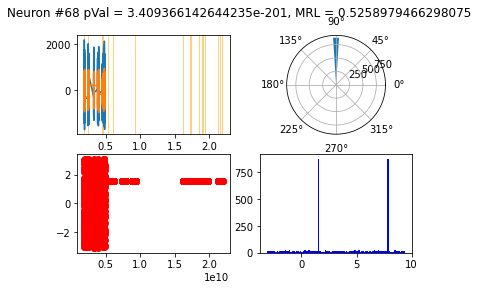

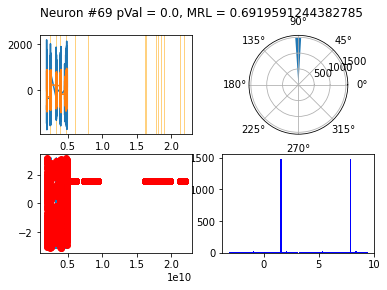

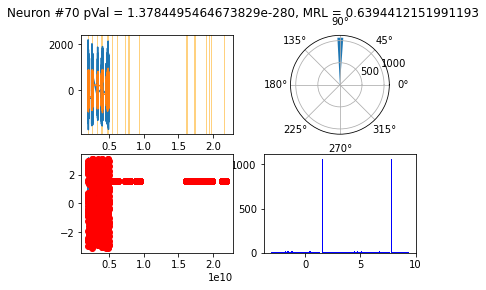

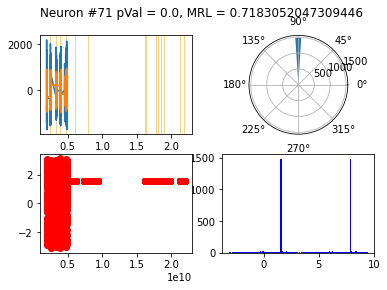

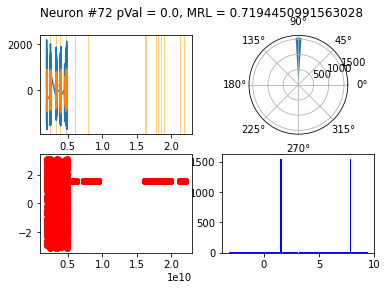

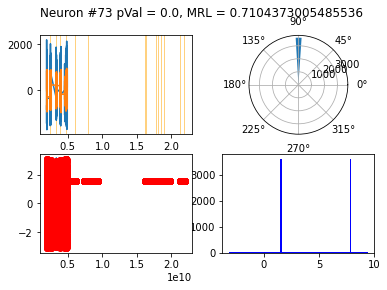

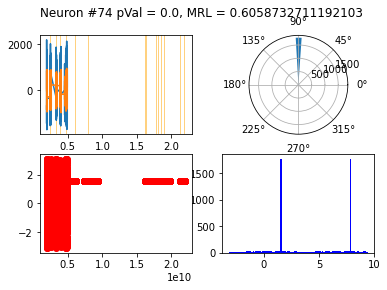

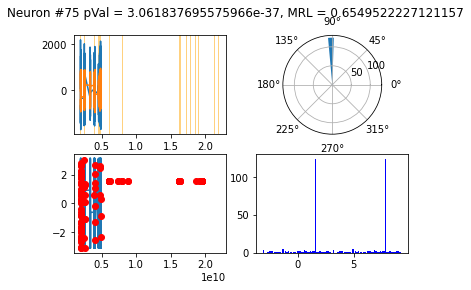

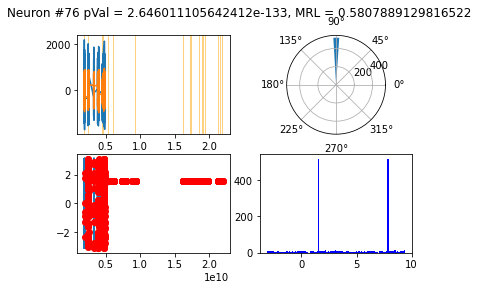

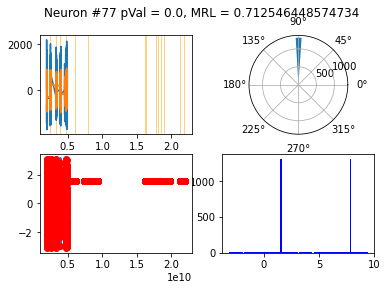

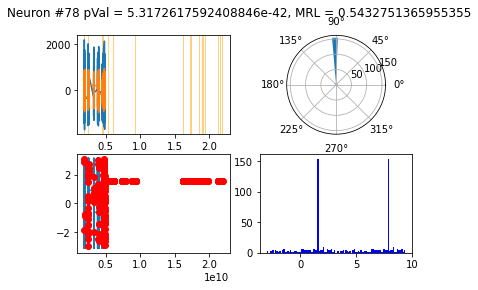

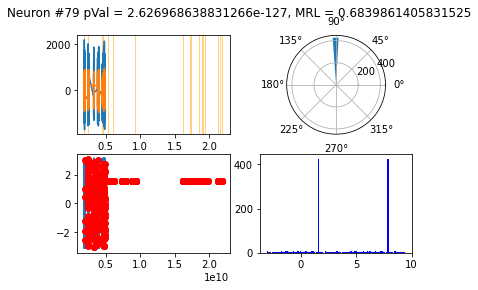

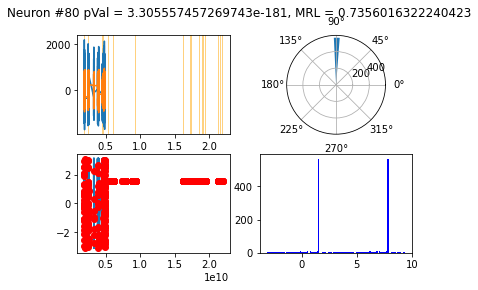

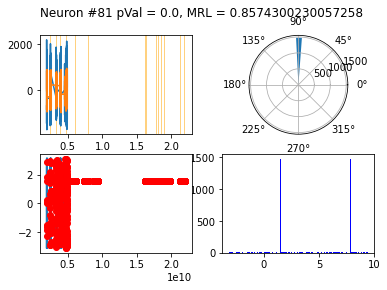

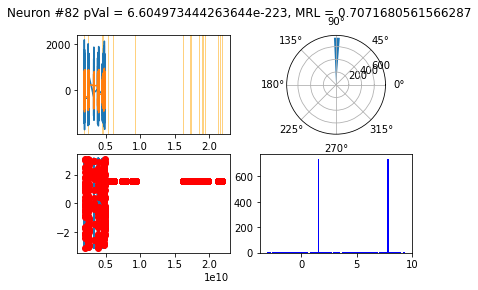

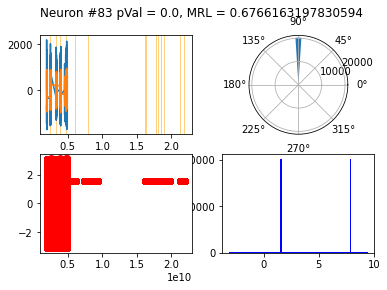

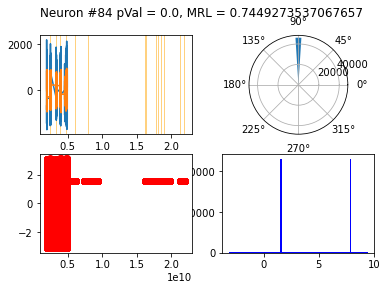

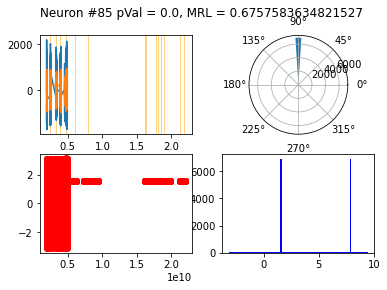

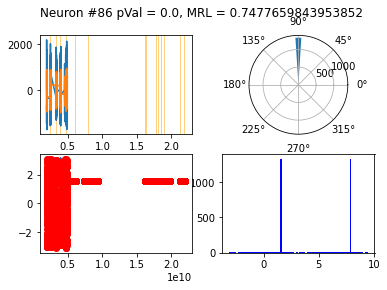

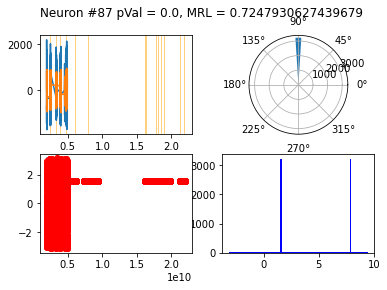

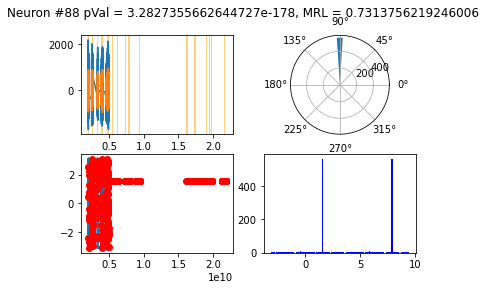

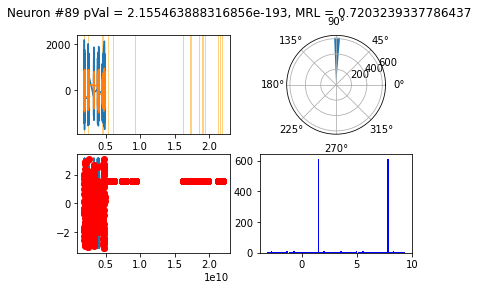

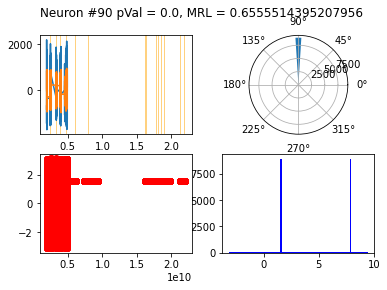

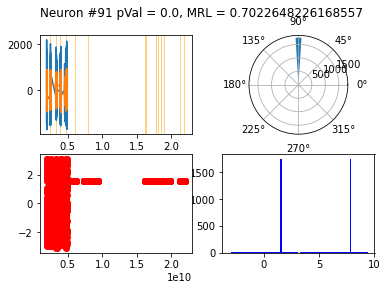

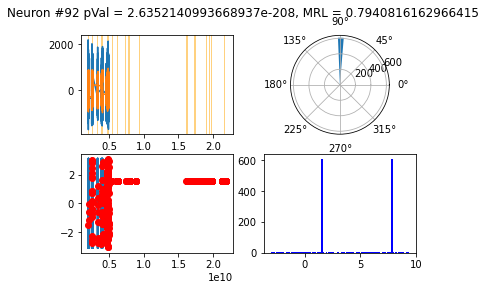

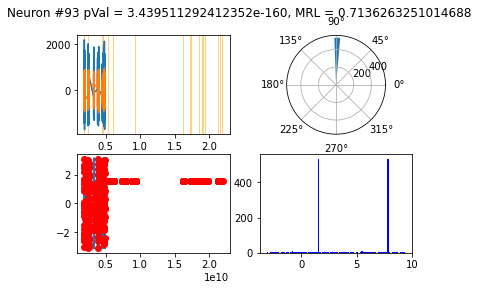

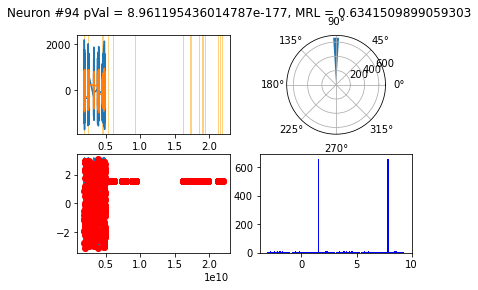

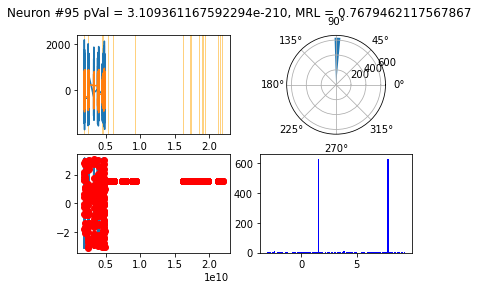

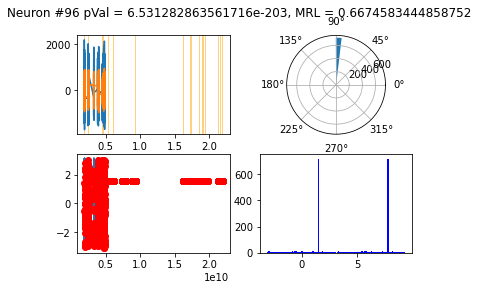

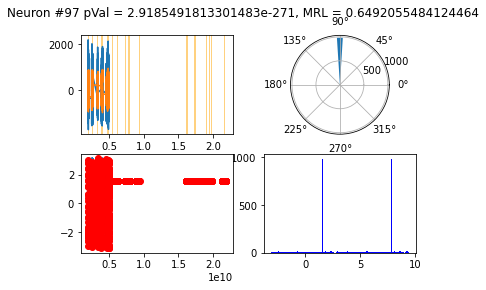

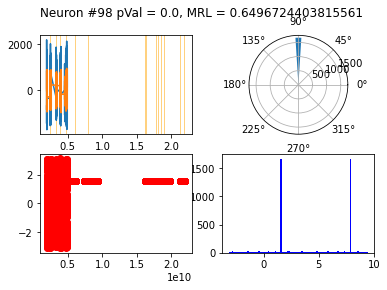

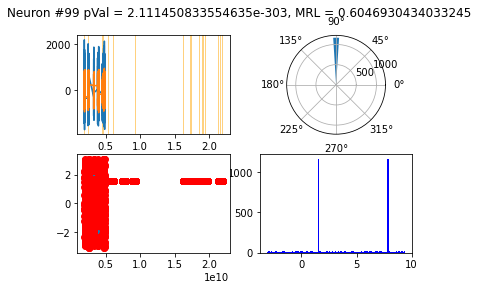

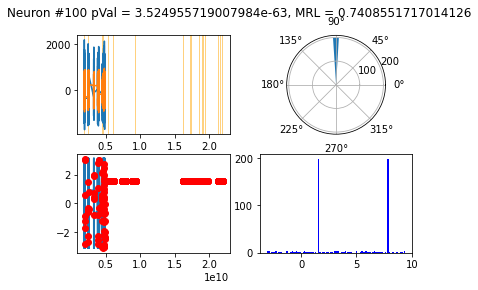

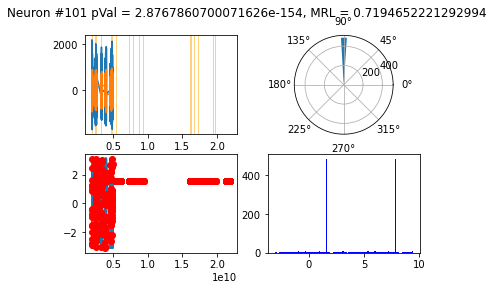

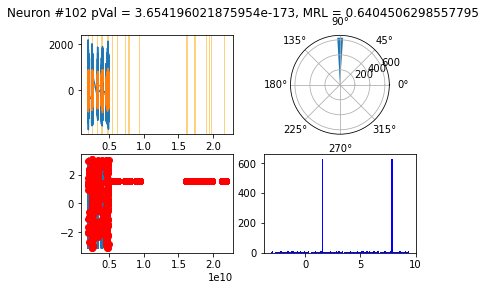

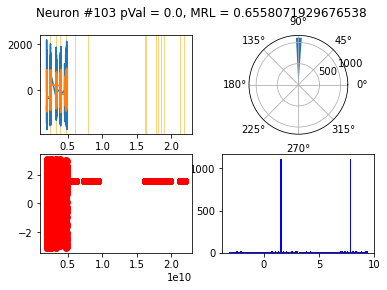

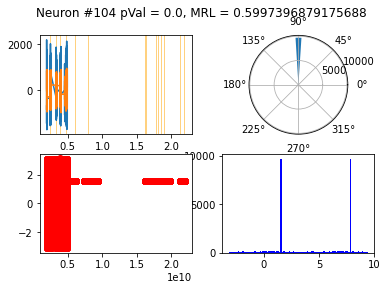

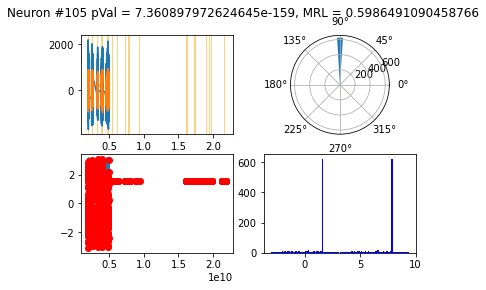

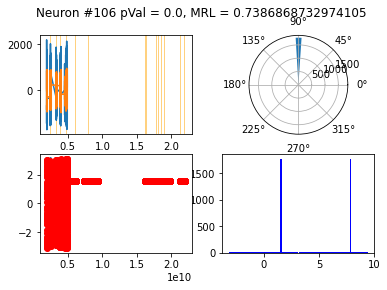

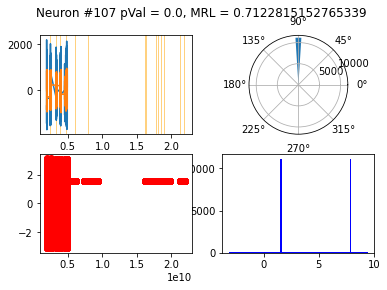

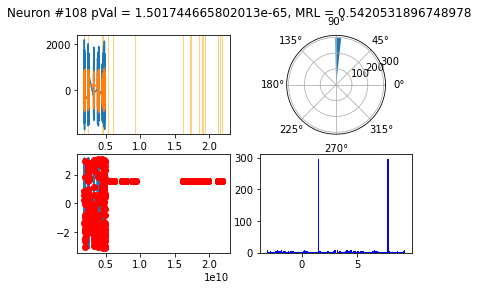

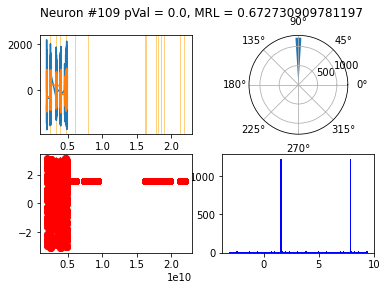

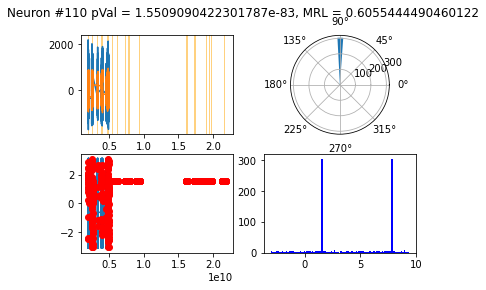

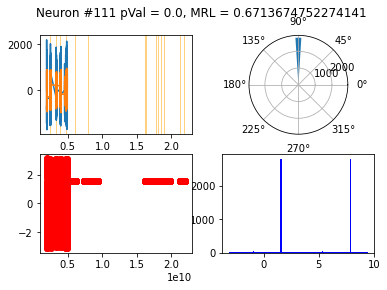

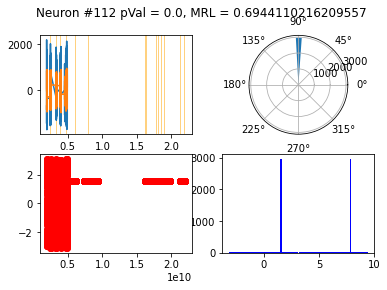

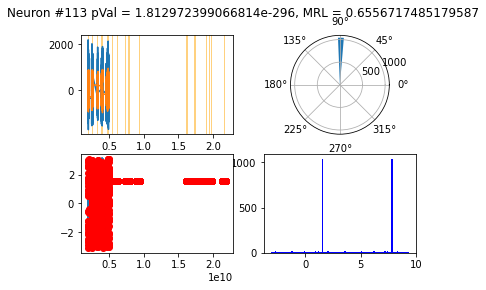

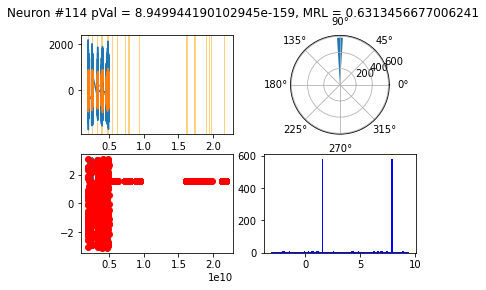

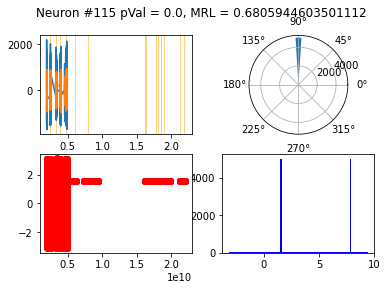

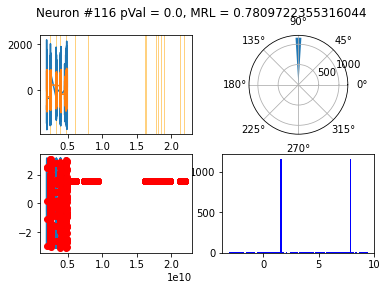

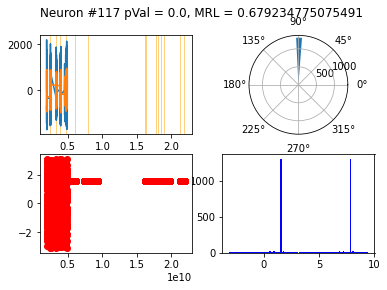

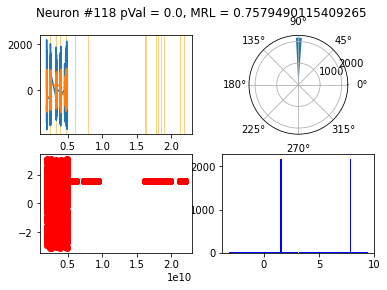

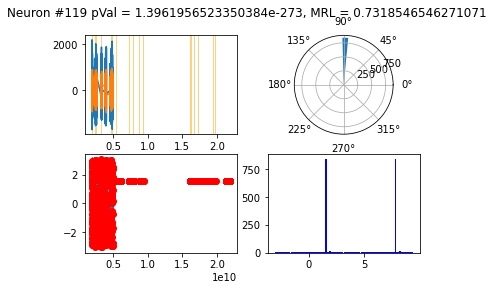

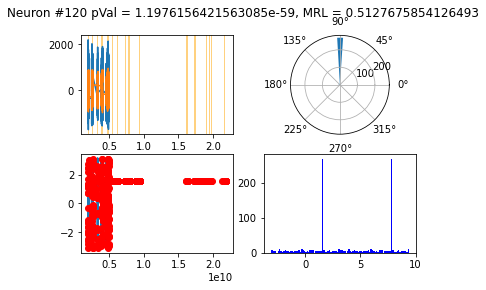

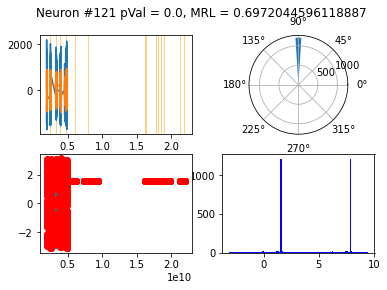

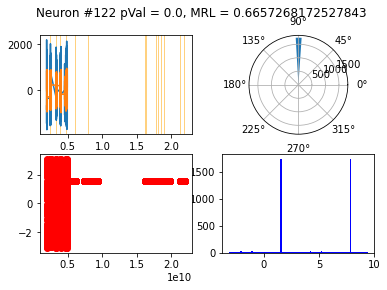

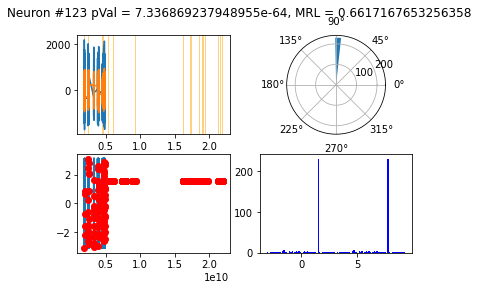

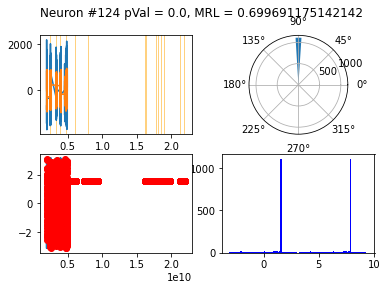

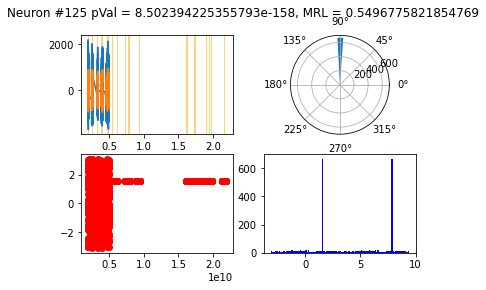

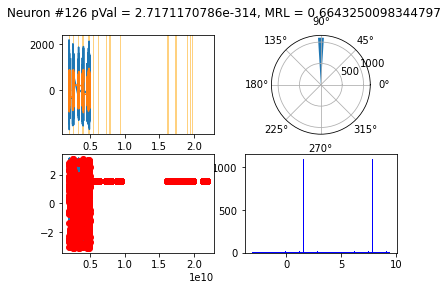

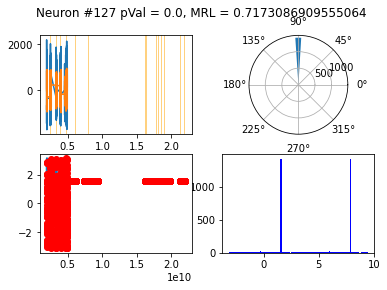

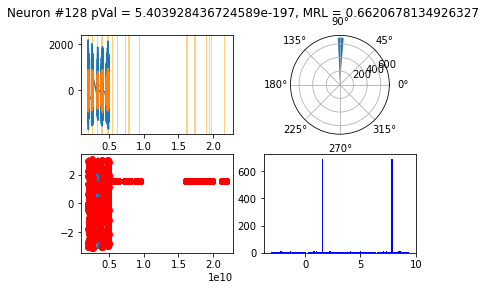

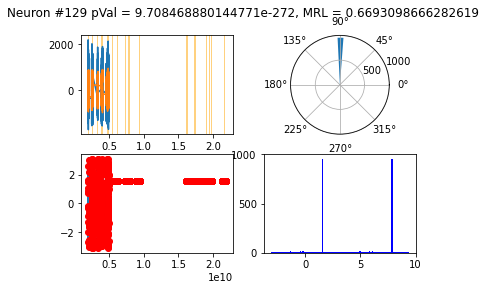

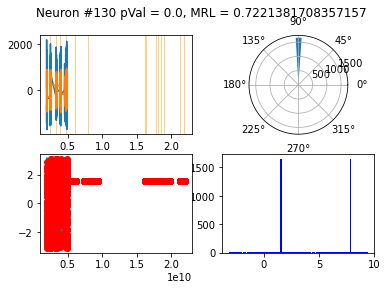

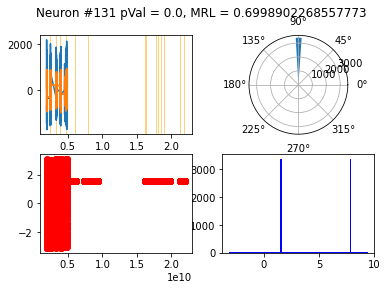

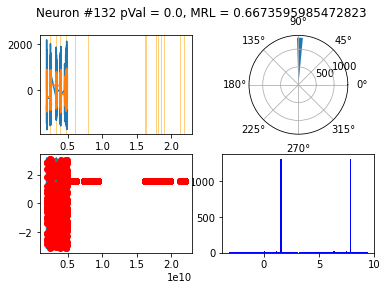

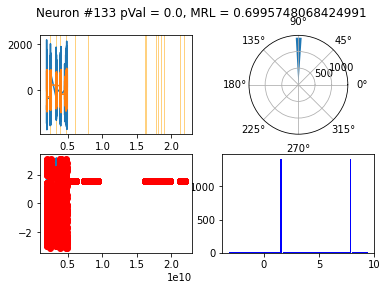

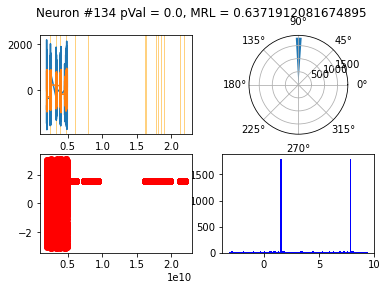

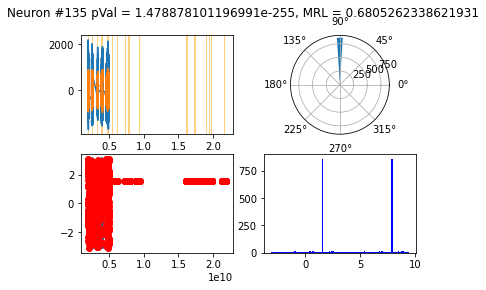

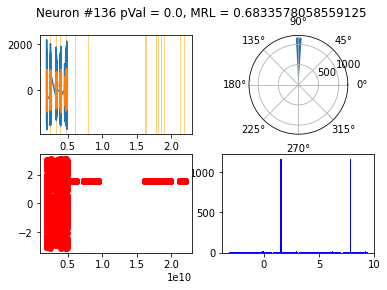

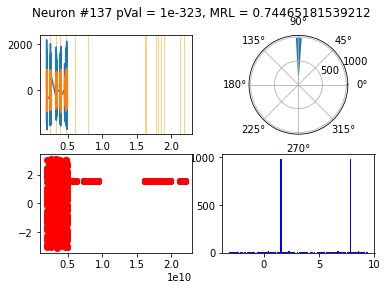

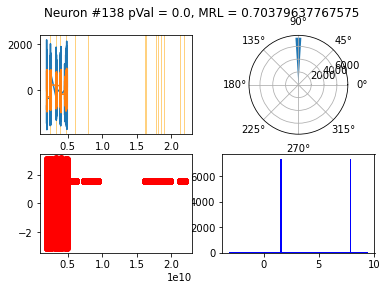

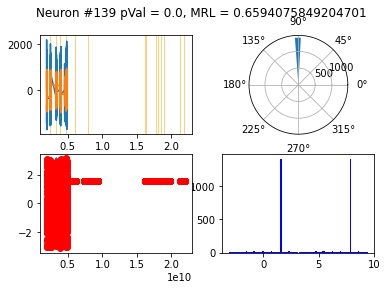

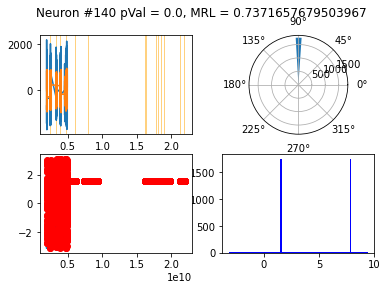

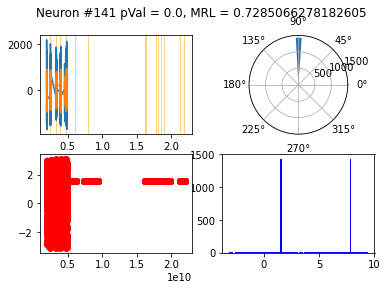

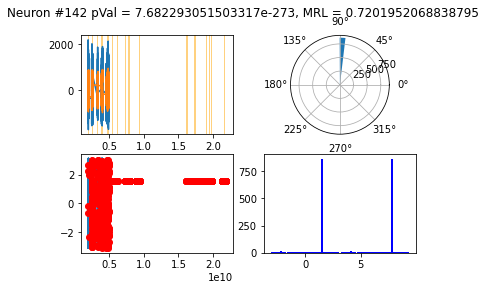

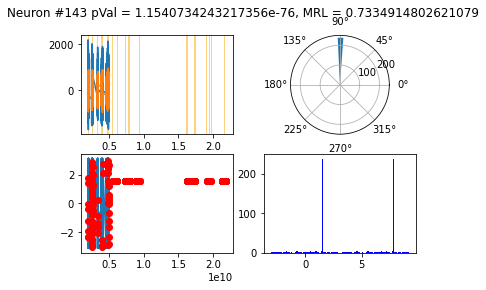

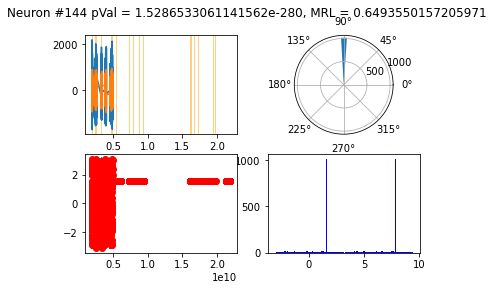

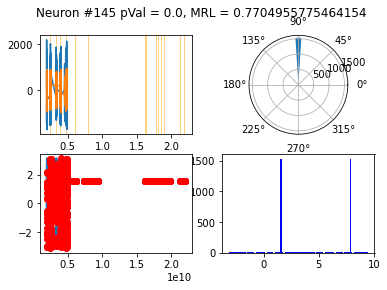

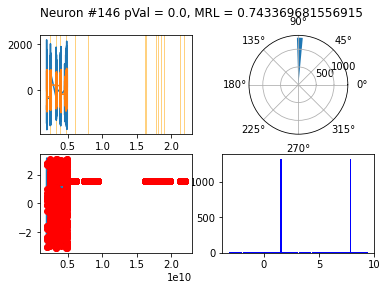

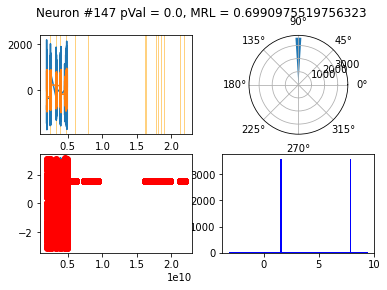

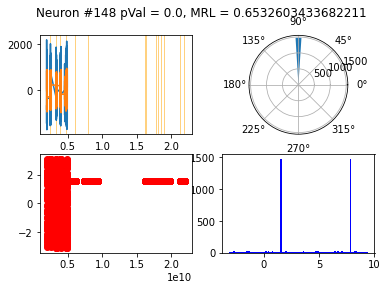

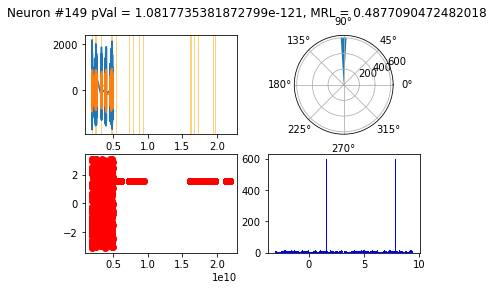

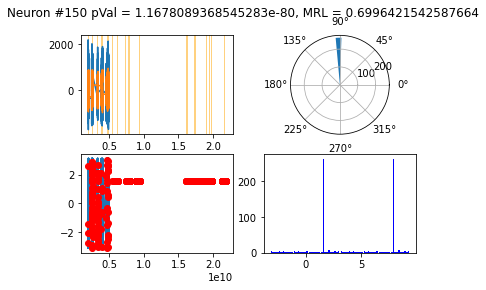

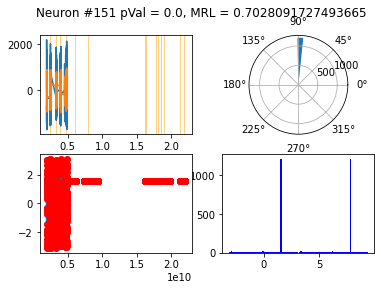

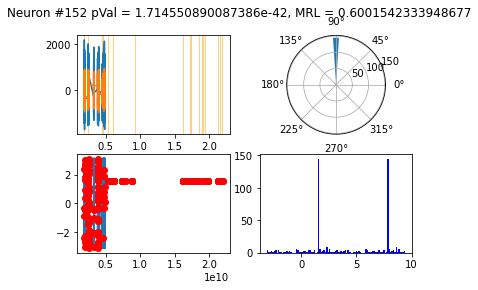

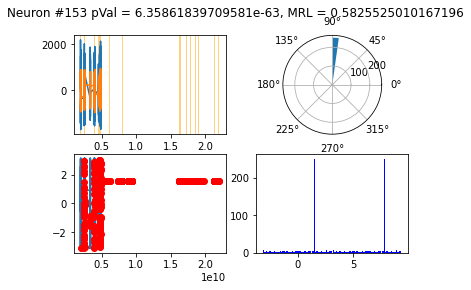

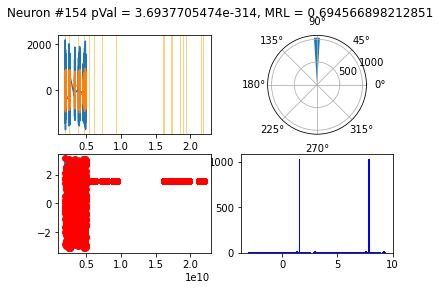

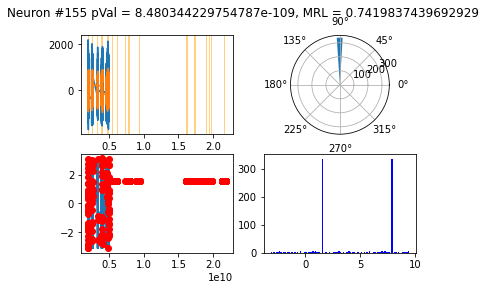

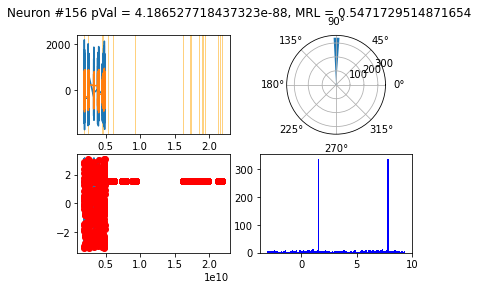

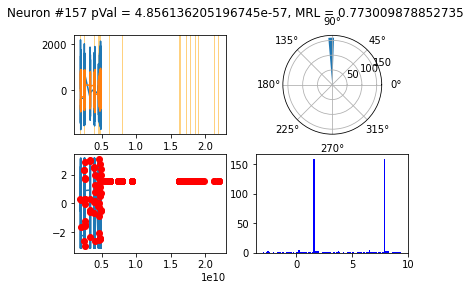

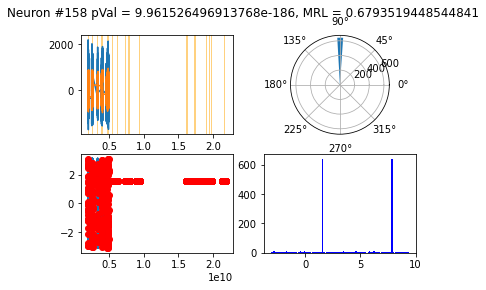

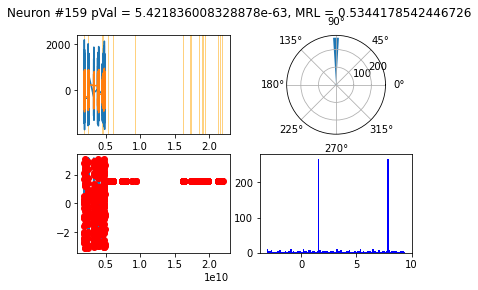

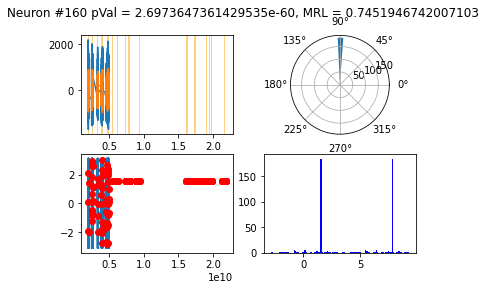

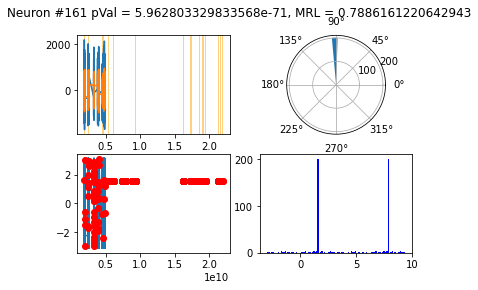

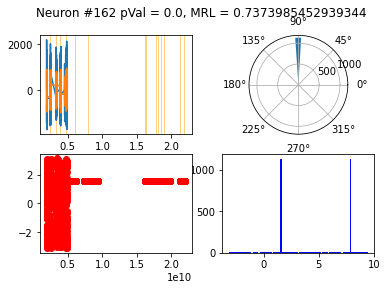

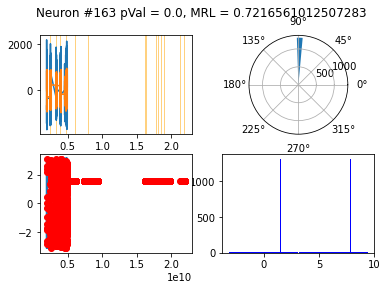

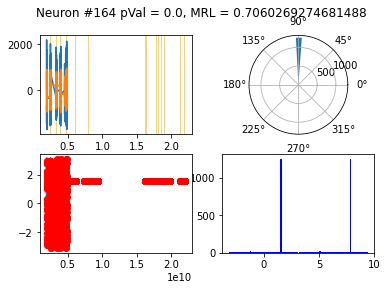

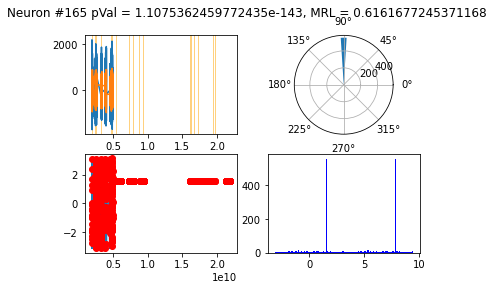

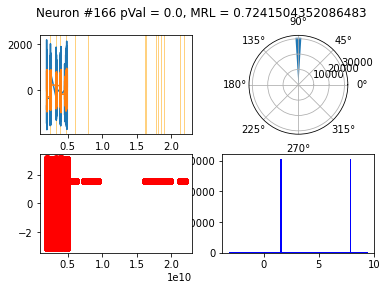

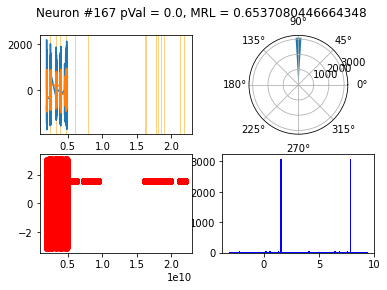

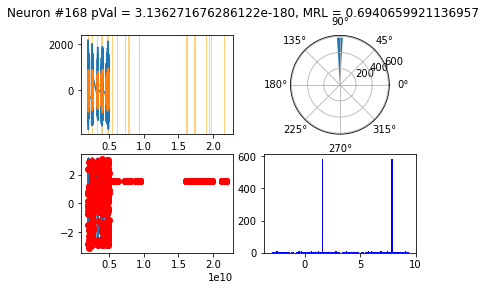

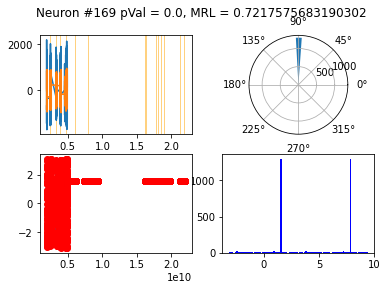

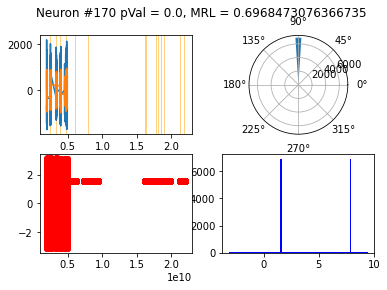

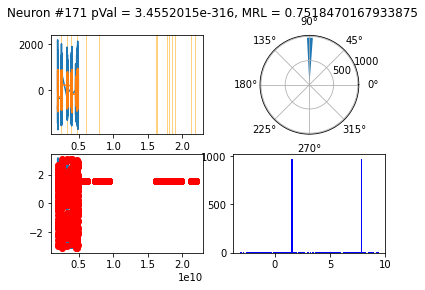

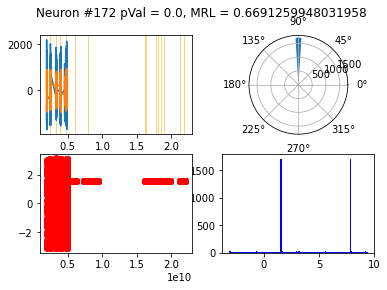

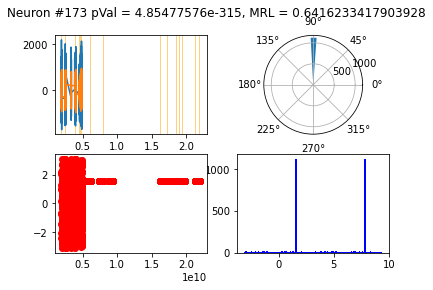

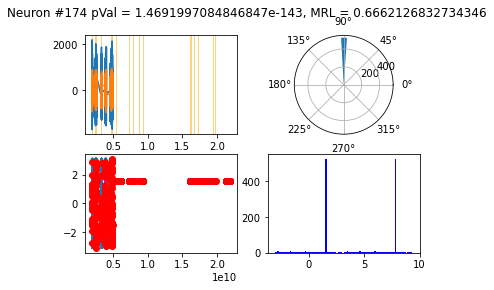

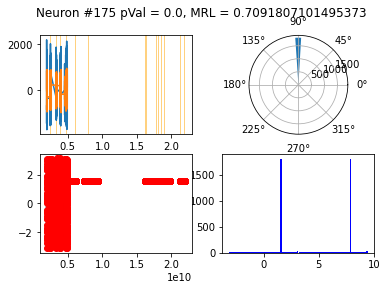

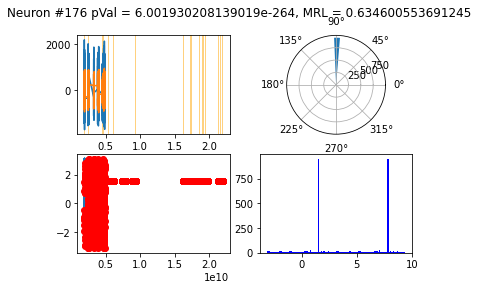

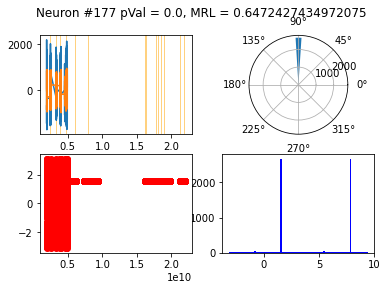

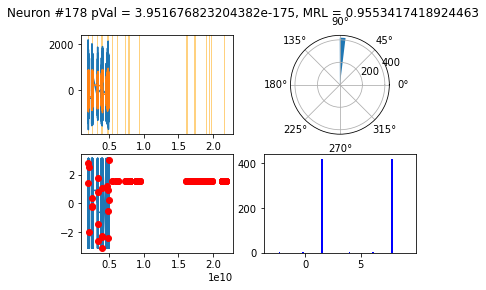

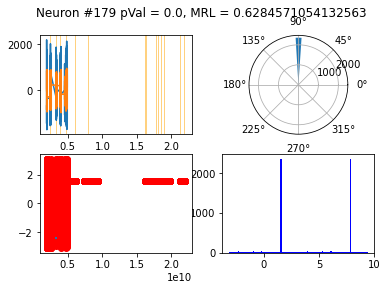

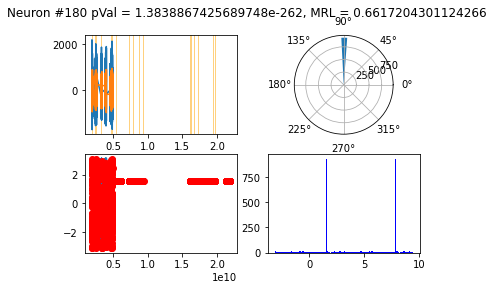

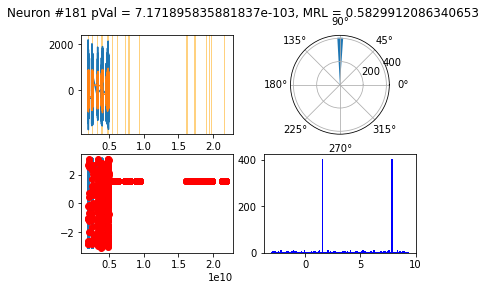

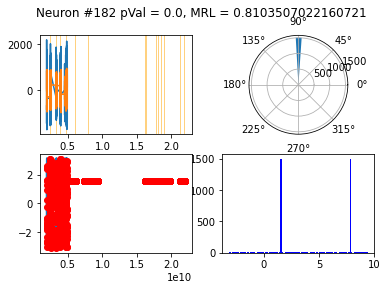

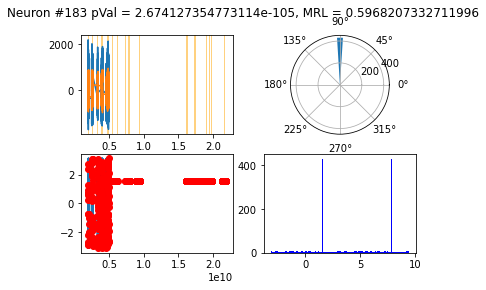

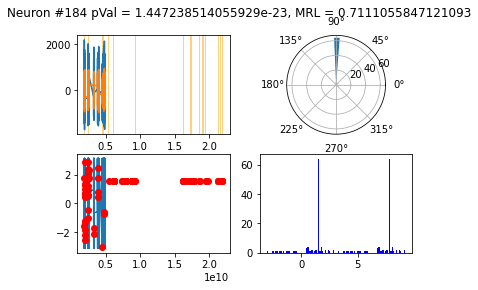

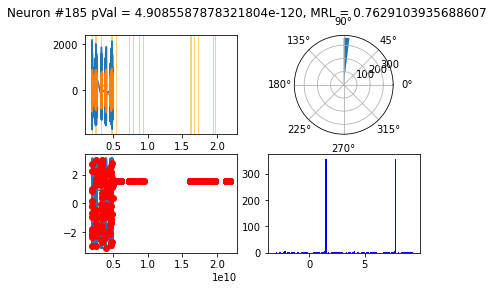

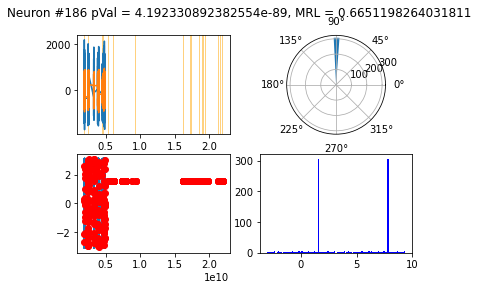

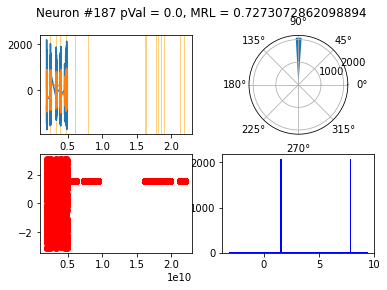

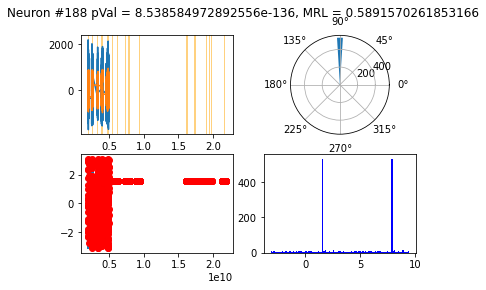

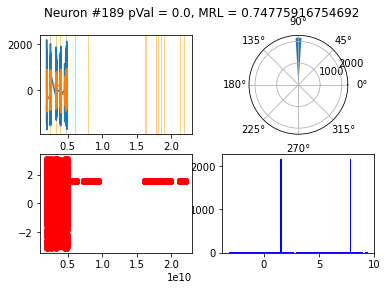

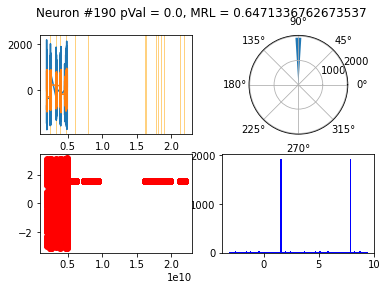

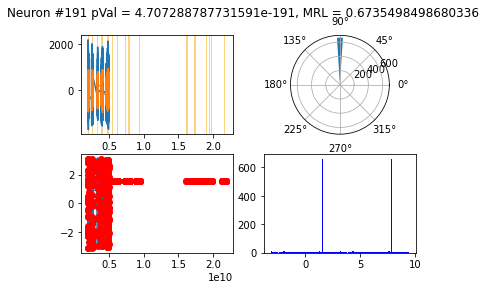

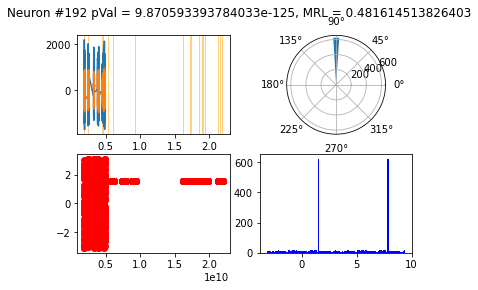

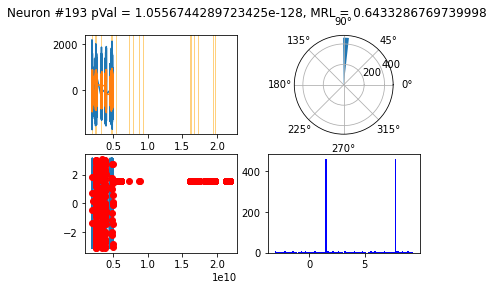

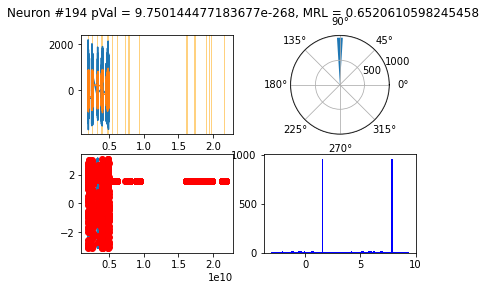

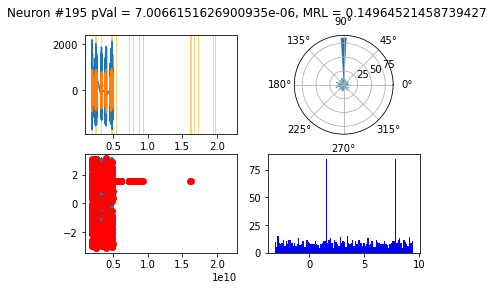

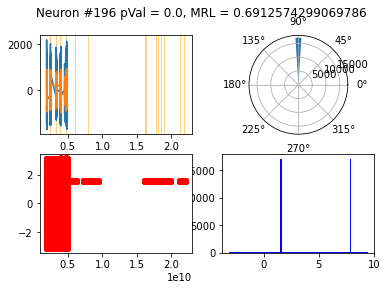

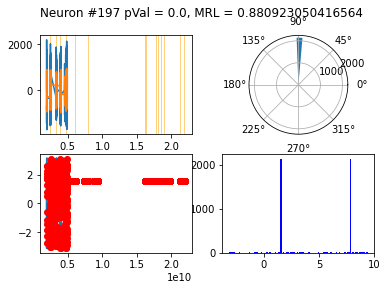

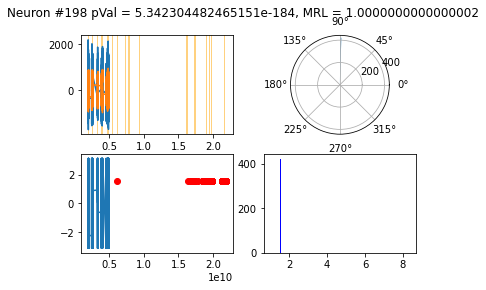

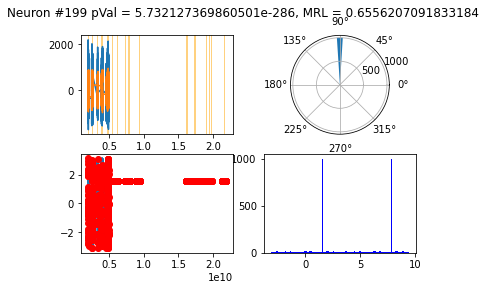

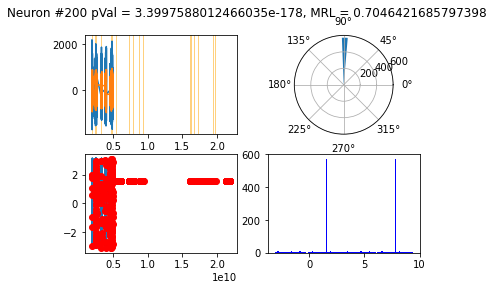

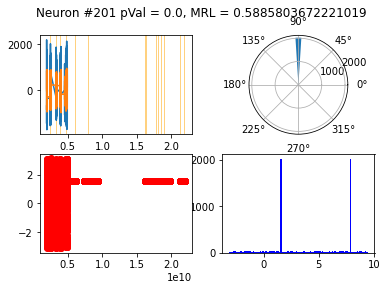

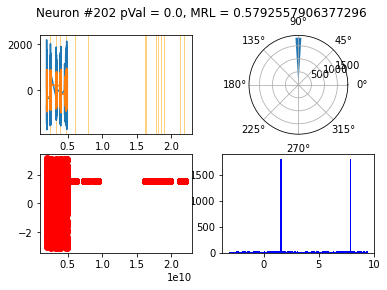

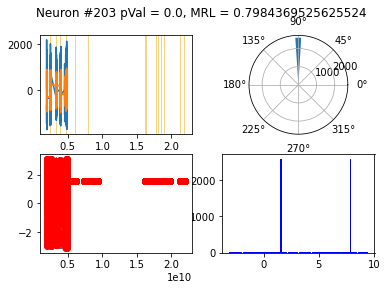

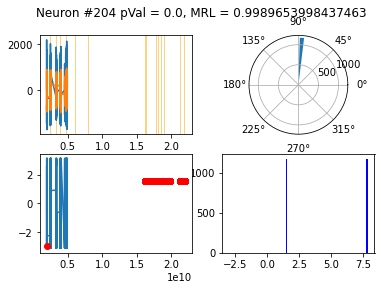

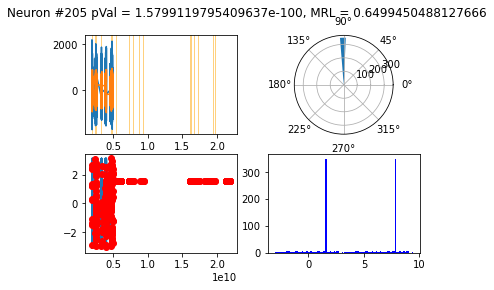

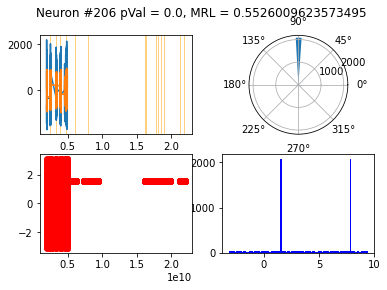

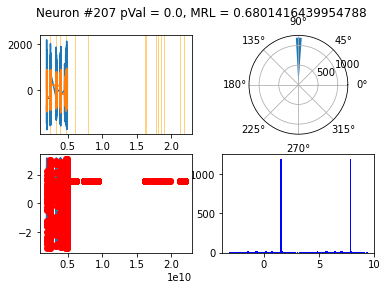

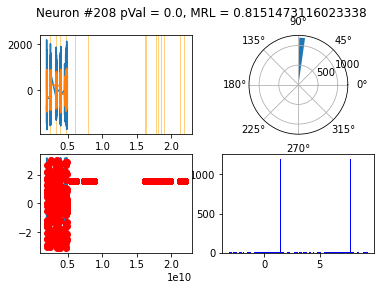

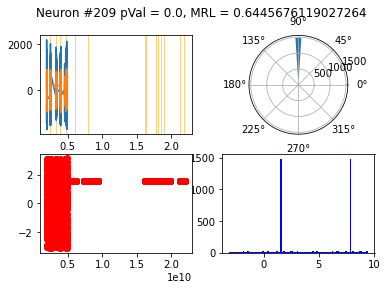

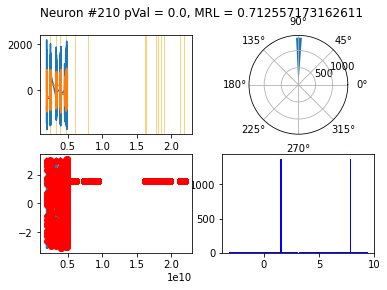

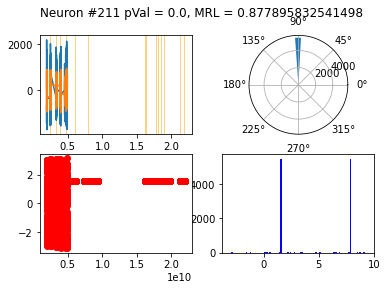

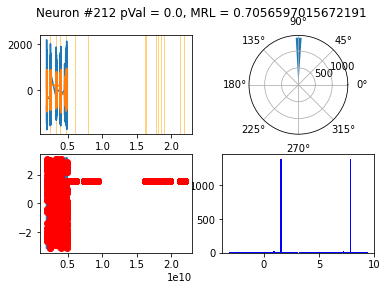

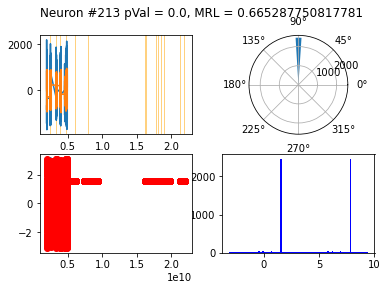

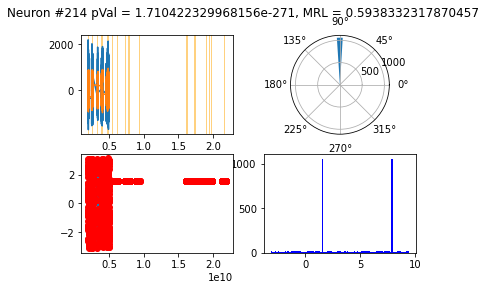

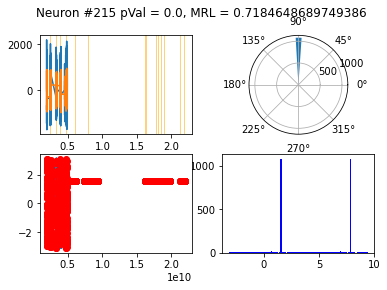

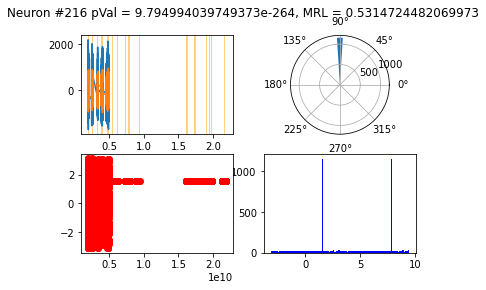

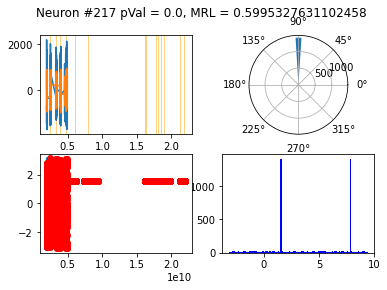

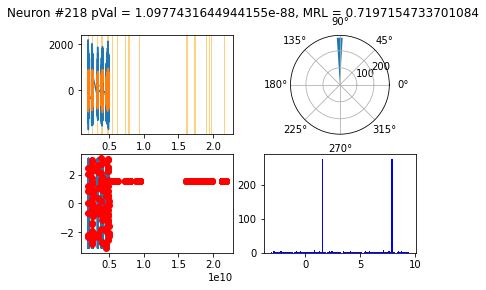

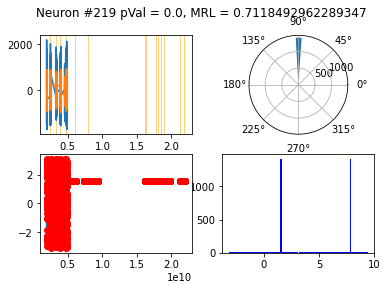

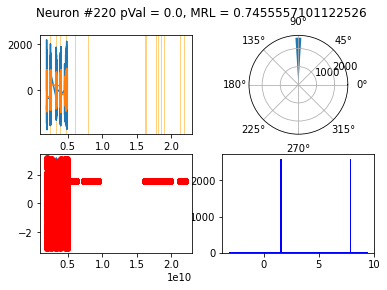

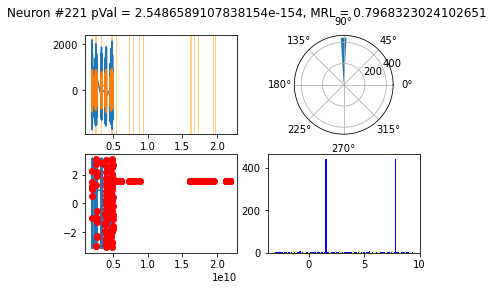

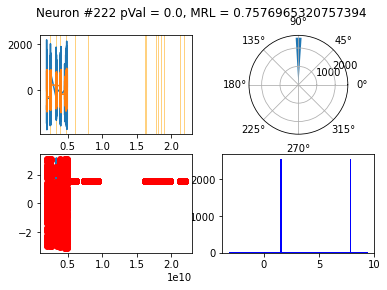

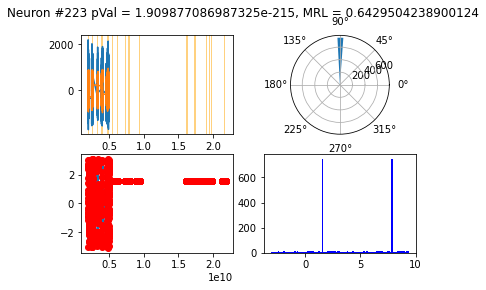

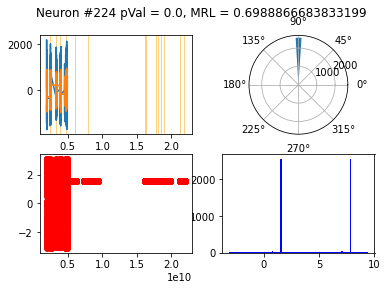

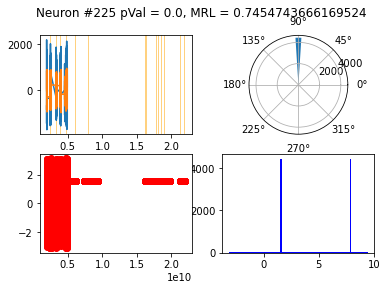

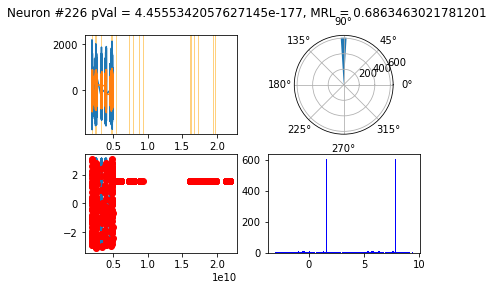

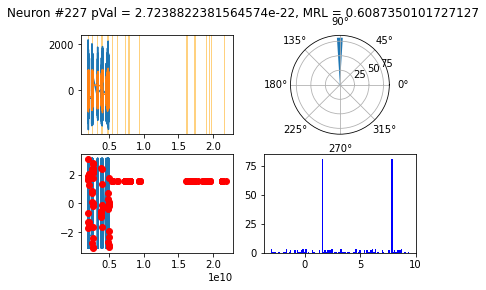

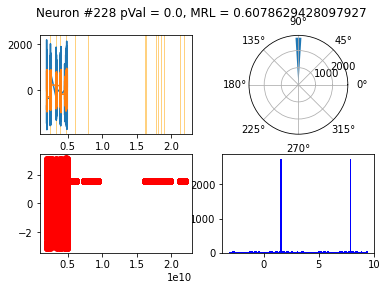

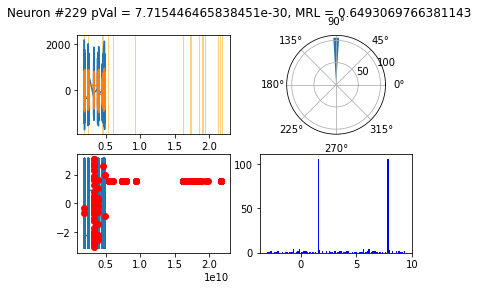

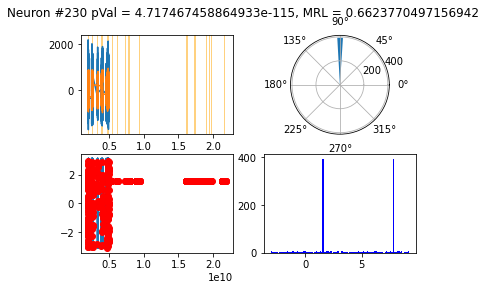

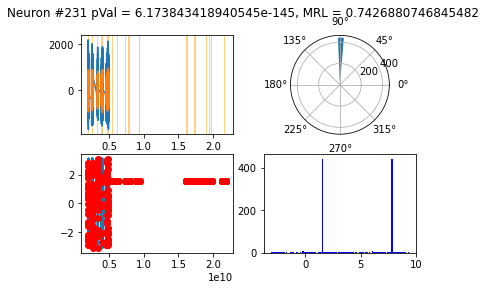

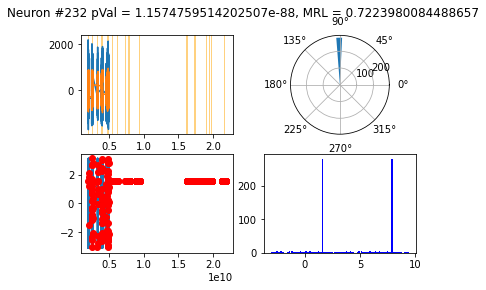

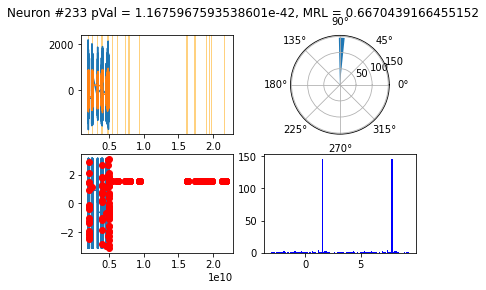

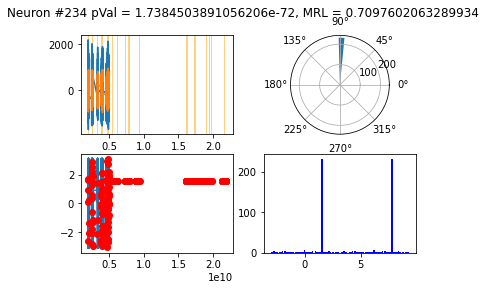

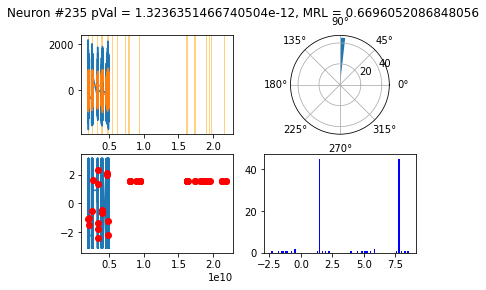

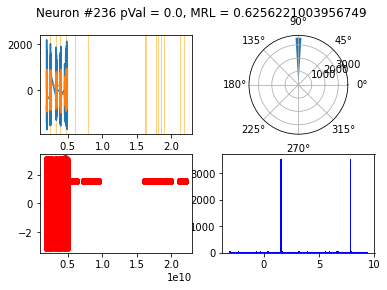

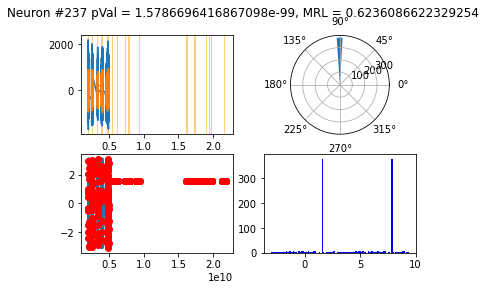

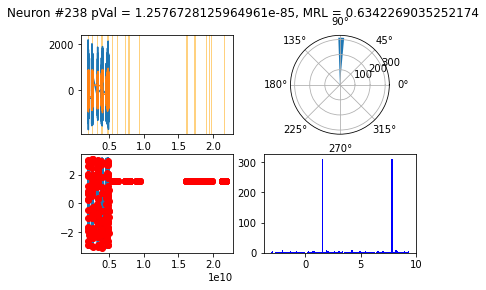

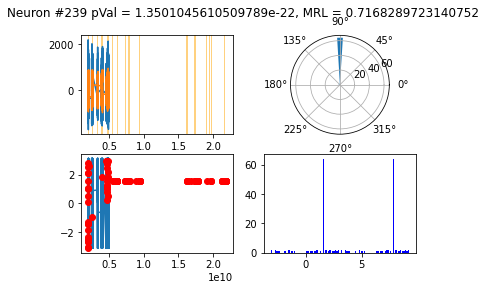

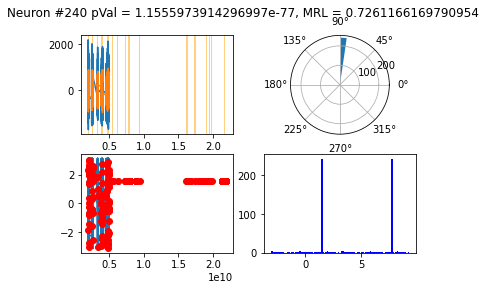

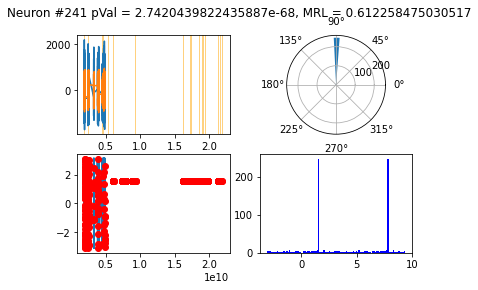

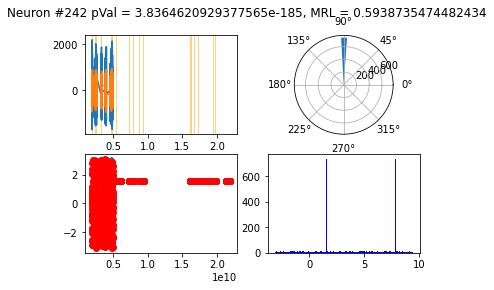

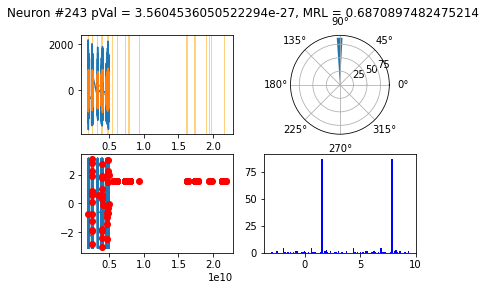

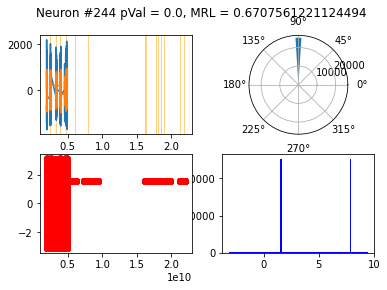

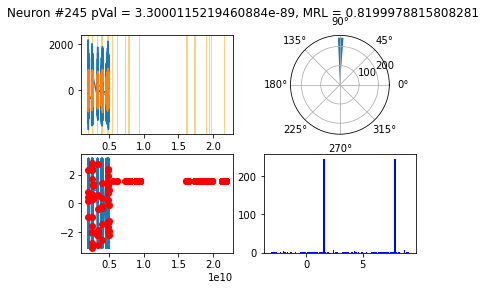

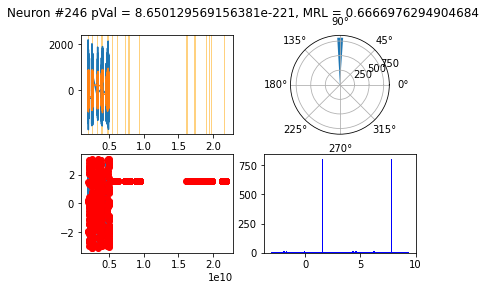

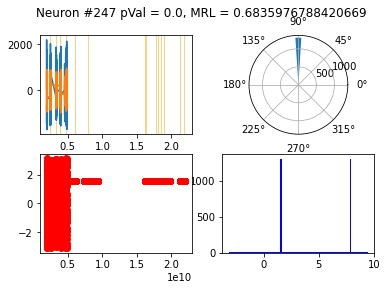

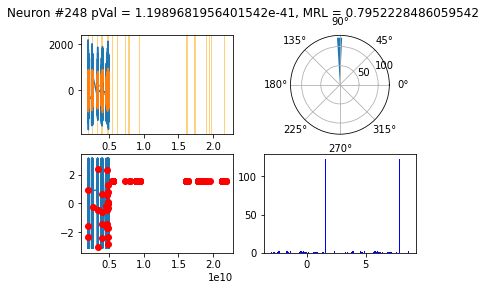

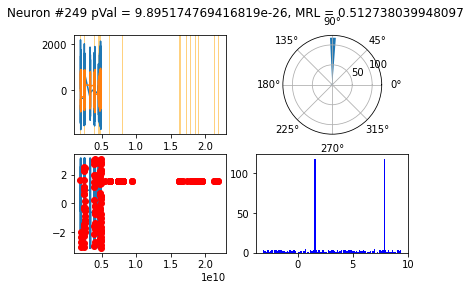

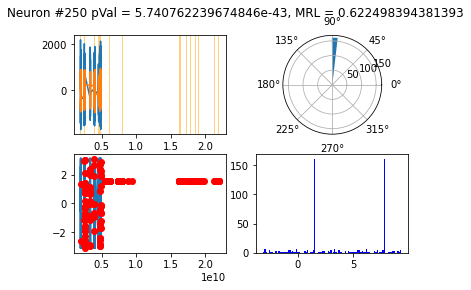

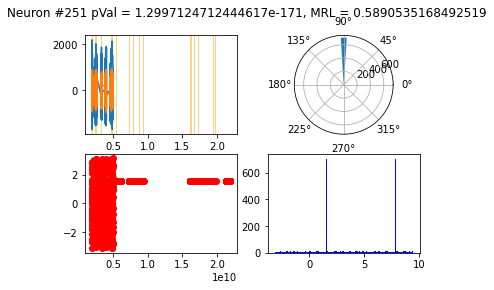

In [12]:
neurons_phase = []
for i,n in enumerate(neurons):
    neurons_phase.append(phase.realign(n.restrict(states['Rem'])))

a = []
pvalue = []
for i,p in enumerate(neurons_phase):
#     print(p.values)
    im = np.exp(1j* p.values)
#     print(im)
    pvalue.append(apy.rayleightest(p.values))
    a.append(np.abs((np.nanmean(im))))
#     print(np.abs(np.nanmean(p)))
#     if pvalue < 0.001 and rvalue > 0.04: print(1)
count = 0
for i in range(len(neurons)):
    fig,ax = plt.subplot_mosaic('''
                                A.
                                BC
                                ''')
    polar_ax = fig.add_subplot(2,2,2,polar=True)                                       
    ax['A'].plot(lfp)
    ax['A'].plot(lfp_filt)
    plt.sca(ax['A'])
    bk.plot.intervals(states['Rem'],time_units='us')
    ax['B'].plot(phase)
    ax['B'].plot(neurons_phase[i],'ro')

    h,a_bin = np.histogram(neurons_phase[i].values,50)
    a_bin = np.convolve(a_bin,[.5,.5],'same')[1::]
#     a = a*(360/np.pi)
    polar_ax.bar(a_bin,h,a_bin[1]-a_bin[0])
    ax['C'].bar(a_bin,h,a_bin[1]-a_bin[0],color ='blue')
    ax['C'].bar(a_bin+2*np.pi,h,a_bin[1]-a_bin[0],color ='blue')
#     ax['C'].set_xlim([])

    ax['A'].get_shared_x_axes().join(ax['A'], ax['B']) 
    plt.suptitle(f'Neuron #{i} pVal = {pvalue[i]}, MRL = {a[i]}')
    
    if (pvalue[i] <0.001) and (a[i] > 0.04): count += 1

In [17]:
count

20

In [39]:
apy.rayleightest()

Data already saved in Numpy format, loading them from here:
Rat11-20150330-neurons.npy
Rat11-20150330-metadata.npy


In [15]:
p.as_units('s')

Time (s)
1932.60705     0.512474
1934.18450    -0.866768
1957.53985     0.989487
1957.84760     2.477128
1964.39475    -0.930833
                 ...   
21951.79420   -0.437793
21951.88565   -2.127056
21952.00285    2.710703
21952.12010    1.858501
21952.12950    2.361948
Length: 1134, dtype: float64

In [243]:
h.shape

(50,)

In [247]:
t

array([-3.07790296, -2.95227438, -2.82664579, -2.70101721, -2.57538863,
       -2.44976005, -2.32413147, -2.19850289, -2.0728743 , -1.94724572,
       -1.82161714, -1.69598856, -1.57035998, -1.4447314 , -1.31910281,
       -1.19347423, -1.06784565, -0.94221707, -0.81658849, -0.69095991,
       -0.56533132, -0.43970274, -0.31407416, -0.18844558, -0.062817  ,
        0.06281158,  0.18844017,  0.31406875,  0.43969733,  0.56532591,
        0.69095449,  0.81658307,  0.94221166,  1.06784024,  1.19346882,
        1.3190974 ,  1.44472598,  1.57035456,  1.69598315,  1.82161173,
        1.94724031,  2.07286889,  2.19849747,  2.32412605,  2.44975464,
        2.57538322,  2.7010118 ,  2.82664038,  2.95226896,  3.07789754])